# Fitting ASCENDS Line Experimental Data

Data originally reported in Long, D., et al., Frequency-agile, rapid scanning cavity ring-down spectroscopy (FARS-CRDS) measurements of the (30012)←(00001) near-infrared carbon dioxide band. Journal of Quantitative Spectroscopy and Radiative Transfer, 2015. 161: p. 35-40.  Fitting of this data is used in the Adkins and Hodges, Assessment of the precision, bias and numerical correlation of fitted parameters obtained by multi-spectrum fits of the Hartmann-Tran line profile to simulated spectra, JQSRT (under review).


In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import MATS

import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("poster")


HAPI version: 1.1.1.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


## Define Spectrum Instances


In [2]:
#Generic Fit Parameters
wave_range = 1.5 #range outside of experimental x-range to simulate
IntensityThreshold = 1e-30 #intensities must be above this value to be simulated
Fit_Intensity = 1e-23 #intensities must be above this value for the line to be fit
order_baseline_fit = 1
tau_column = 'Alpha' # Mean tau/us
freq_column = 'Wavenumber' # Total Frequency /MHz
pressure_column = 'Pressure'
temperature_column = 'Temperature'
tau_stats_column = None

#os.chdir(r'C:\Users\ema3\Documents\DCS Fitting\Linelists\30012')
#Read in Possible linelists
PARAM_LINELIST = pd.read_csv('JQSRT2021_SDNGP_2015.csv')
PARAM_LINELIST.loc[PARAM_LINELIST['n_delta0_air'].isna(), 'n_delta0_air'] = 0
etalons = {1:[0.004321,1.168], 2:[0.001377, 59.38], 3:[0.0004578, 29.75]}#{1:[0.003,1.141231], 2:[0.00124, 59.058025], 3:[0.000348, 28.708762]}# 0.980885   0.002972}#{ },

os.chdir(path)


spec_1 = Spectrum('spectrum_CO2_Air_1%Ar_56Torr_03_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)


spec_2 = Spectrum('spectrum_CO2_Air_1%Ar_83Torr_02_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_3 = Spectrum('spectrum_CO2_Air_1%Ar_101Torr_01_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_4 = Spectrum('spectrum_CO2_Air_1%Ar_109Torr_03_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                  etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_5 = Spectrum('spectrum_CO2_Air_1%Ar_152Torr_01_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_6 = Spectrum('spectrum_CO2_Air_1%Ar_186Torr_03_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_7 = Spectrum('spectrum_CO2_Air_1%Ar_269Torr_01_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_8 = Spectrum('spectrum_CO2_Air_1%Ar_271Torr_03_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)




SPECTRA = Dataset([spec_1, spec_2, spec_3, spec_4, spec_5, spec_6, spec_7, spec_8], 'MATS_Example',PARAM_LINELIST)


In [3]:
#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
BASE_LINELIST = SPECTRA.generate_baseline_paramlist()

FITPARAMS = Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST, lineprofile = 'SDNGP', linemixing = False, 
                                          fit_intensity = Fit_Intensity, threshold_intensity = IntensityThreshold, sim_window = wave_range,
                                          nu_constrain = True, sw_constrain = False, gamma0_constrain = True, delta0_constrain = True, 
                                           aw_constrain = True, as_constrain = True, 
                                           nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True,
                                            additional_columns = ['local_lower_quanta'])

FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {2:{1:True}}, vary_sw = {2:{1:True}},
                                                 vary_gamma0 = {2:{1: True}},
                                                 vary_delta0 = {2:{1: True}},
                                                 vary_aw = {2:{1: True}},
                                                 vary_as = {2:{1: True}},
                                                 vary_nuVC = {2:{1:True}},
                                                 vary_eta = {}, vary_linemixing = {2:{1:False}})
FITPARAMS.generate_fit_baseline_linelist(vary_baseline = True, vary_molefraction = {2:False}, vary_pressure = False, vary_temperature = False, vary_xshift = False, 
                                        vary_etalon_amp= True, vary_etalon_period= True, vary_etalon_phase= True)


Segment Number  Pressure  Pressure_err  Pressure_vary  \
Spectrum Number                                                          
1.0                         0.0  0.073747             0          False   
1.0                         1.0  0.073747             0          False   
1.0                         2.0  0.073747             0          False   
1.0                         3.0  0.073747             0          False   
2.0                         0.0  0.109482             0          False   
2.0                         1.0  0.109482             0          False   
2.0                         2.0  0.109482             0          False   
2.0                         3.0  0.109482             0          False   
3.0                         0.0  0.132529             0          False   
3.0                         1.0  0.132529             0          False   
3.0                         2.0  0.132529             0          False   
3.0                         3.0  0.132529             0          False   
4.0                         0.0  0.142618             0          False   
4.0                         1.0  0.142618             0          False   
4.0                         2.0  0.142618             0          False   
4.0                         3.0  0.142618             0          False   
5.0                         0.0  0.199886             0          False   
5.0                         1.0  0.199886             0          False   
5.0                         2.0  0.199886             0          False   
5.0                         3.0  0.199886             0          False   
6.0                         0.0  0.243783             0          False   
6.0                         1.0  0.243783             0          False   
6.0                         2.0  0.243783             0          False   
6.0                         3.0  0.243783             0          False   
7.0                         0.0  0.353395             0          False   
7.0                         1.0  0.353395             0          False   
7.0                         2.0  0.353395             0          False   
7.0                         3.0  0.353395             0          False   
8.0                         0.0  0.355892             0          False   
8.0                         1.0  0.355892             0          False   
8.0                         2.0  0.355892             0          False   
8.0                         3.0  0.355892             0          False   

                 Temperature  Temperature_err  Temperature_vary  baseline_a  \
Spectrum Number                                                               
1.0               296.275731                0             False         0.0   
1.0               296.275731                0             False         0.0   
1.0               296.275731                0             False         0.0   
1.0               296.275731                0             False         0.0   
2.0               296.318849                0             False         0.0   
2.0               296.318849                0             False         0.0   
2.0               296.318849                0             False         0.0   
2.0               296.318849                0             False         0.0   
3.0               296.337066                0             False         0.0   
3.0               296.337066                0             False         0.0   
3.0               296.337066                0             False         0.0   
3.0               296.337066                0             False         0.0   
4.0               296.233753                0             False         0.0   
4.0               296.233753                0             False         0.0   
4.0               296.233753                0             False         0.0   
4.0               296.233753                0             False         0.0   
5.0               296.291868                0             False         0.0   

Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_1_0           0.07375     -inf      inf        0    False     None     None
Pressure_1_1           0.07375     -inf      inf        0    False     None     None
Pressure_1_2           0.07375     -inf      inf        0    False     None     None
Pressure_1_3           0.07375     -inf      inf        0    False     None     None
Pressure_2_0            0.1095     -inf      inf        0    False     None     None
Pressure_2_1            0.1095     -inf      inf        0    False     None     None
Pressure_2_2            0.1095     -inf      inf        0    False     None     None
Pressure_2_3            0.1095     -inf      inf        0    False     None     None
Pressure_3_0            0.1325     -inf      inf        0    False     None     None
Pressure_3_1            0.1325     -inf      inf        0    False     None     None
Pressure_3_2            0.1325     -inf      inf        0    Fa

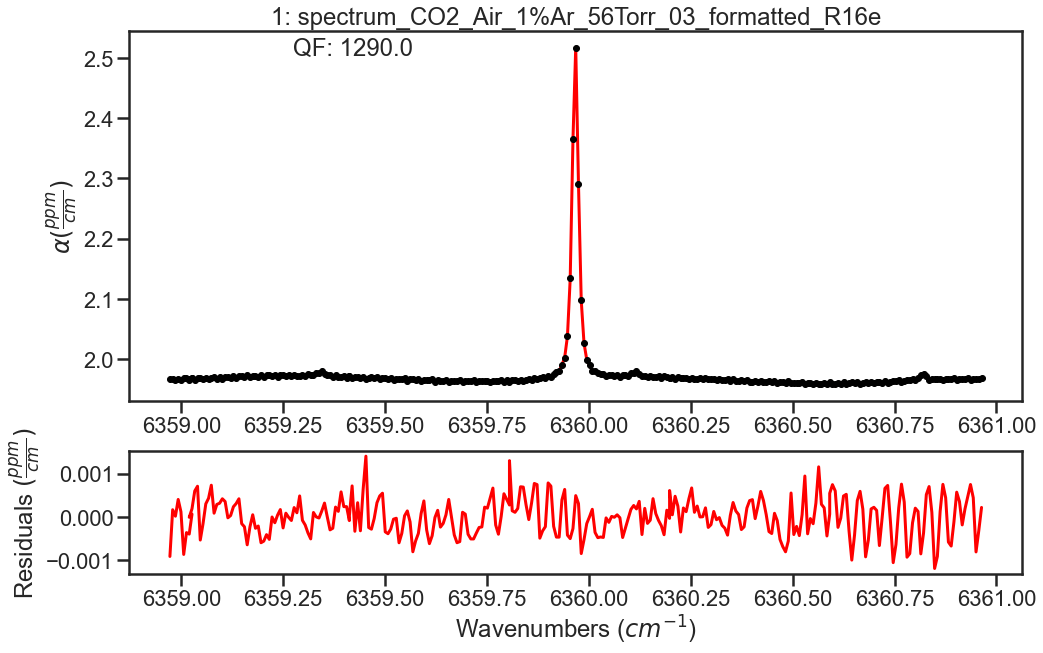

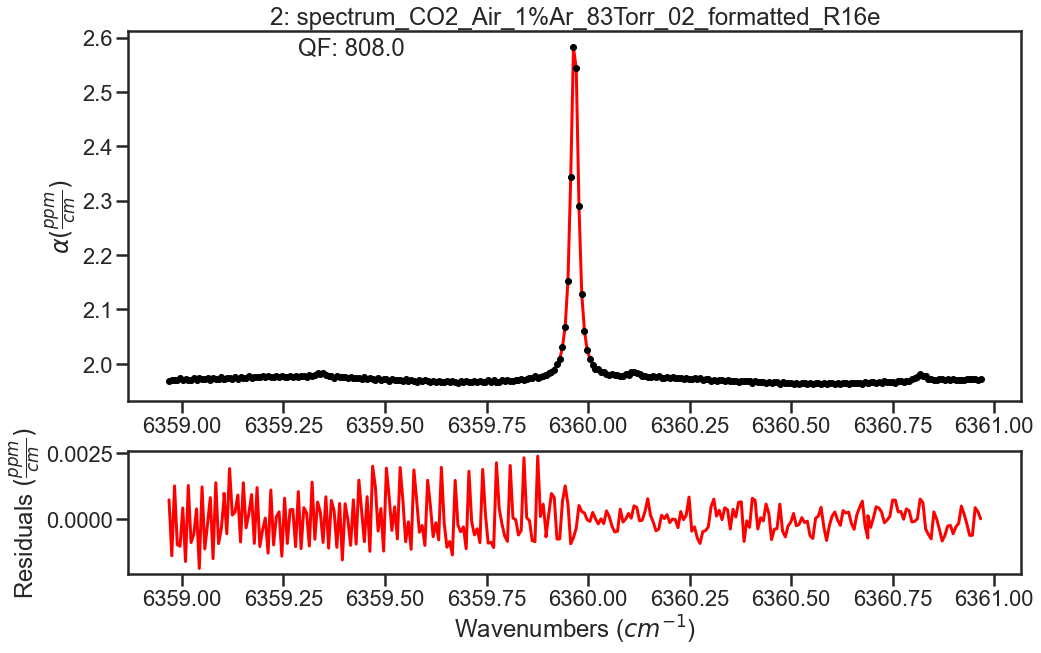

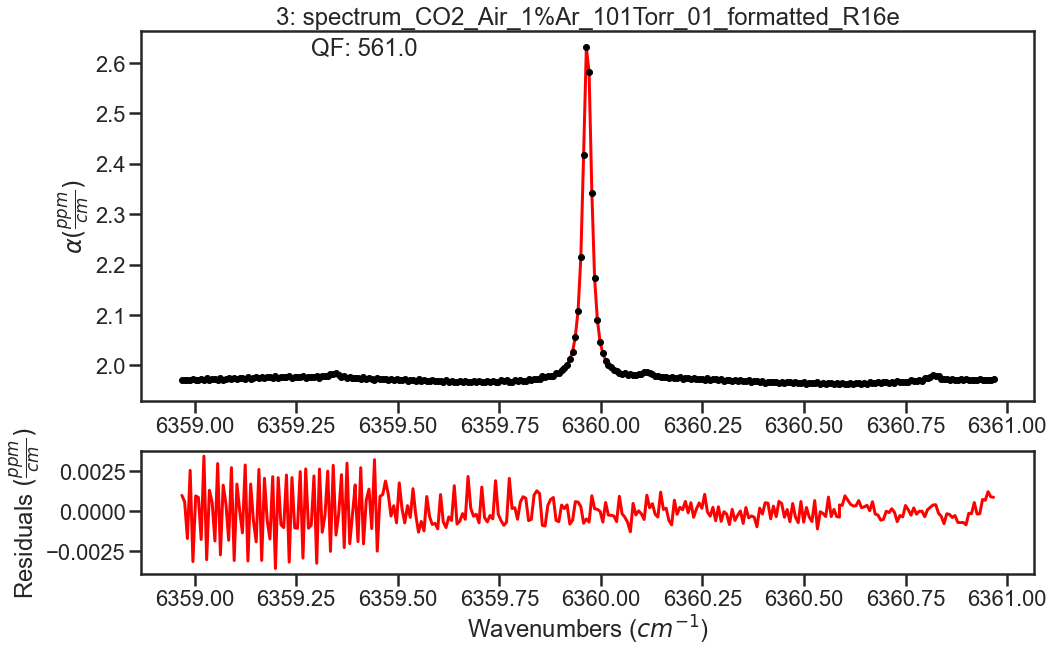

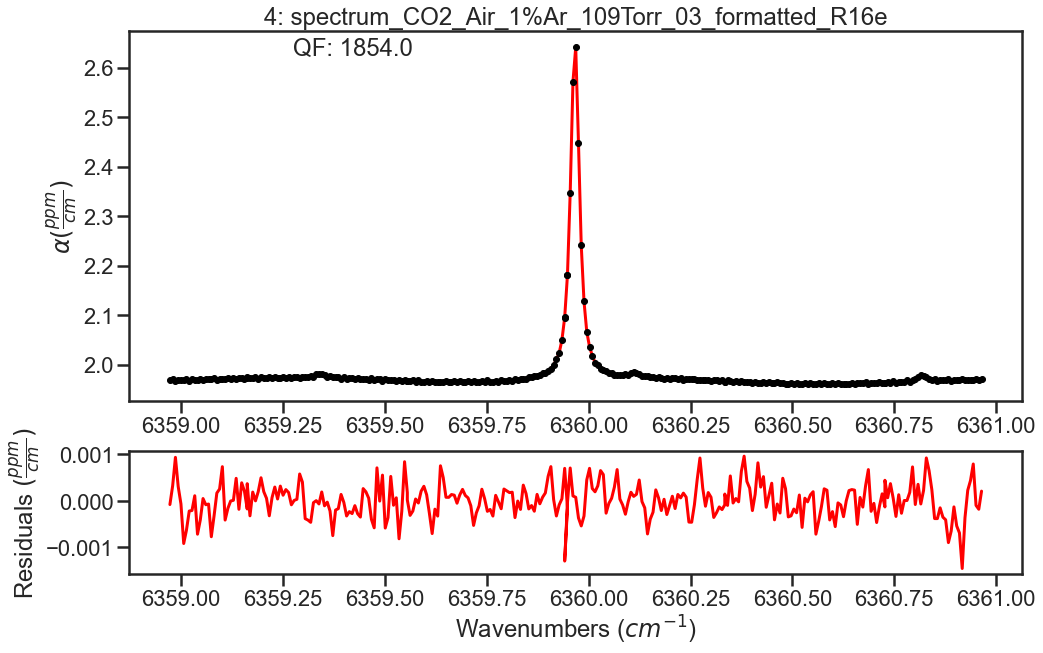

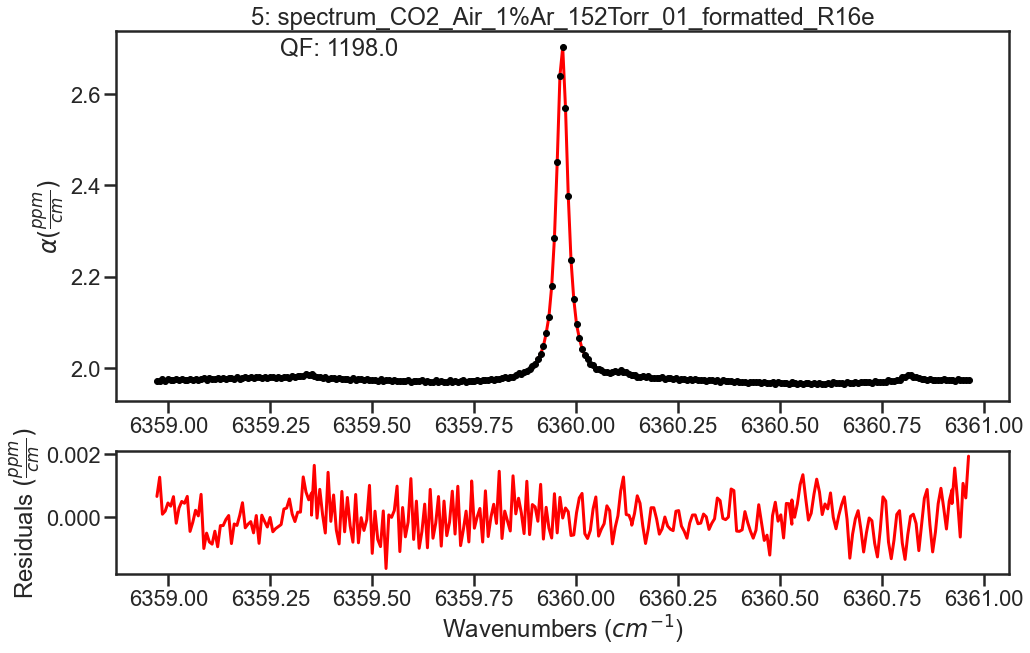

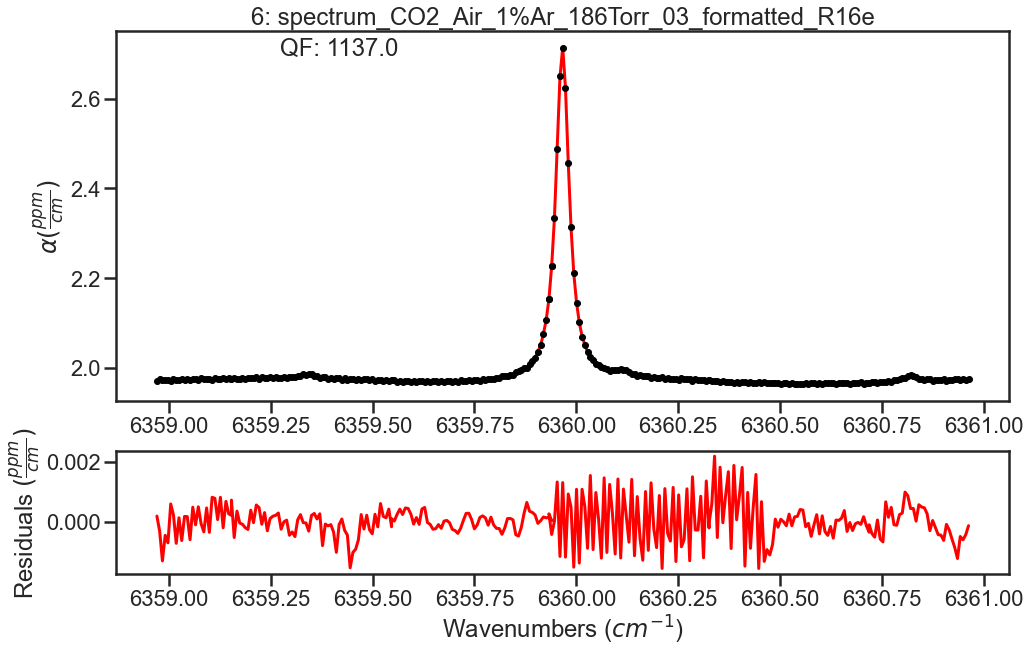

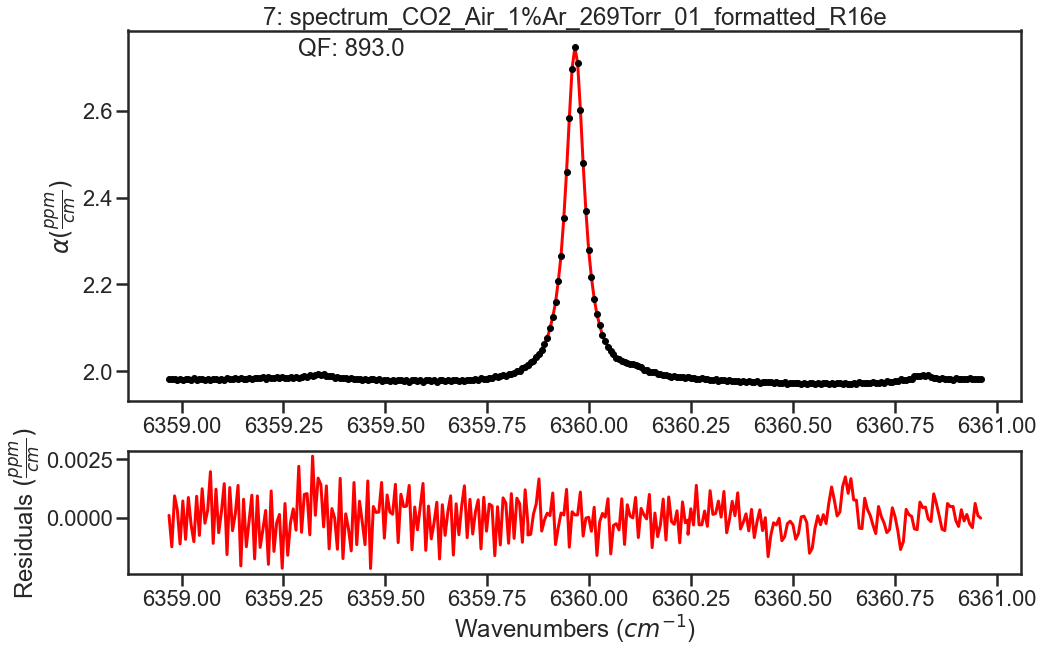

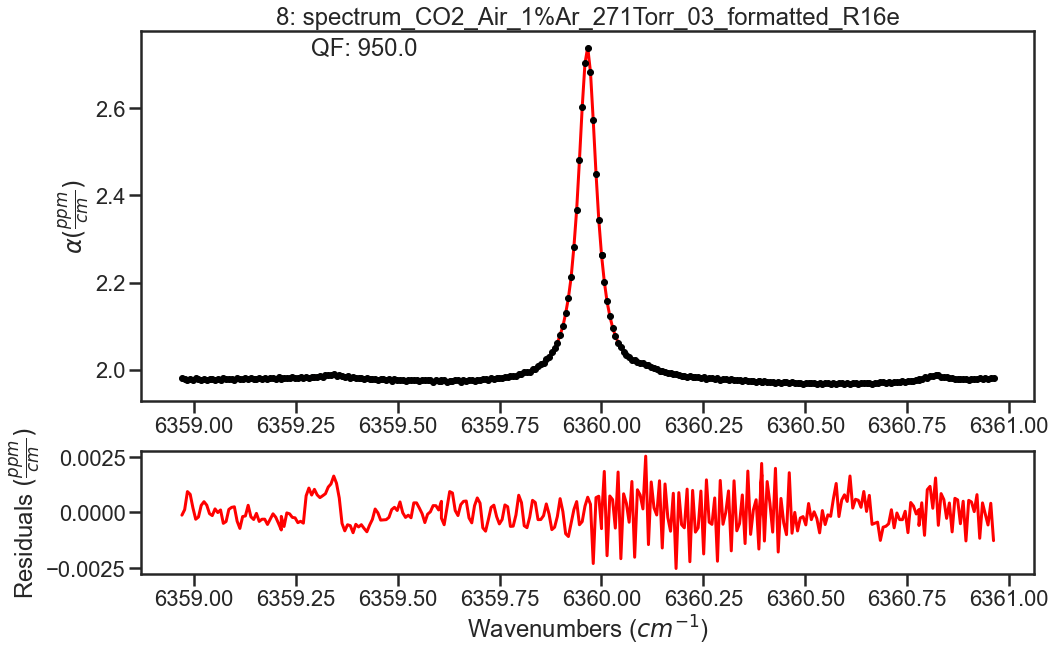

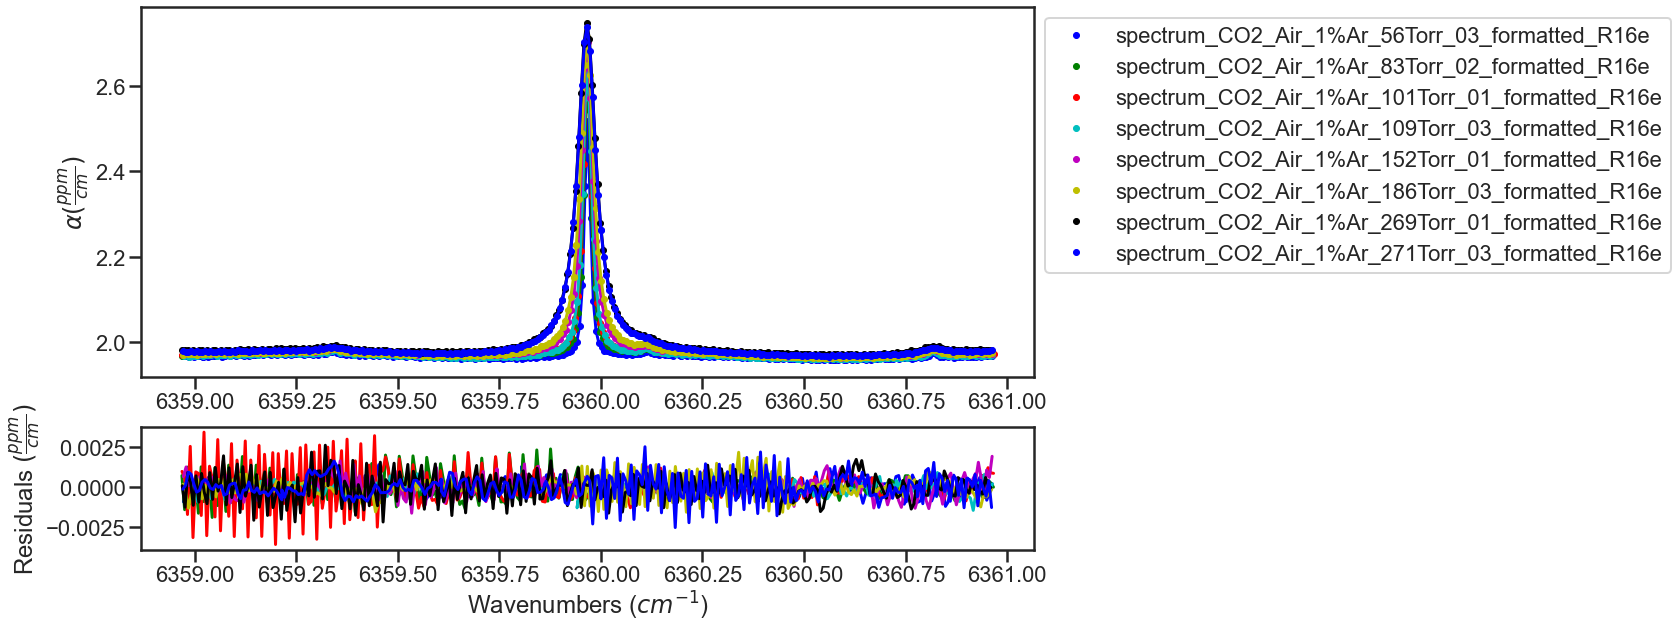

Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_1_0           0.07375     -inf      inf        0    False     None     None
Pressure_1_1           0.07375     -inf      inf        0    False     None     None
Pressure_1_2           0.07375     -inf      inf        0    False     None     None
Pressure_1_3           0.07375     -inf      inf        0    False     None     None
Pressure_2_0            0.1095     -inf      inf        0    False     None     None
Pressure_2_1            0.1095     -inf      inf        0    False     None     None
Pressure_2_2            0.1095     -inf      inf        0    False     None     None
Pressure_2_3            0.1095     -inf      inf        0    False     None     None
Pressure_3_0            0.1325     -inf      inf        0    False     None     None
Pressure_3_1            0.1325     -inf      inf        0    False     None     None
Pressure_3_2            0.1325     -inf      inf        0    Fa

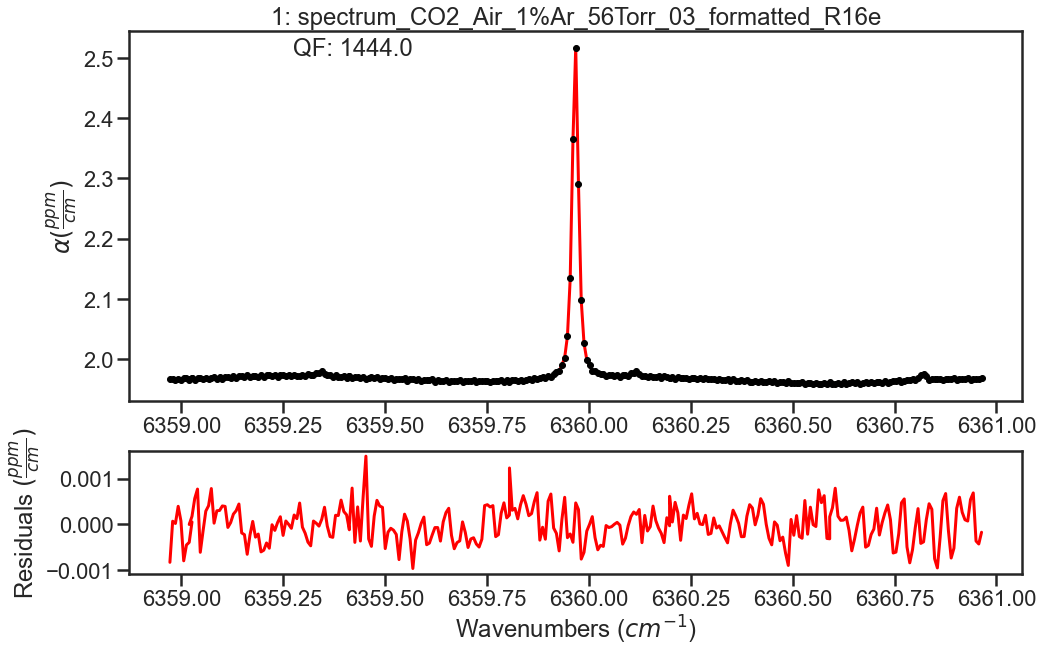

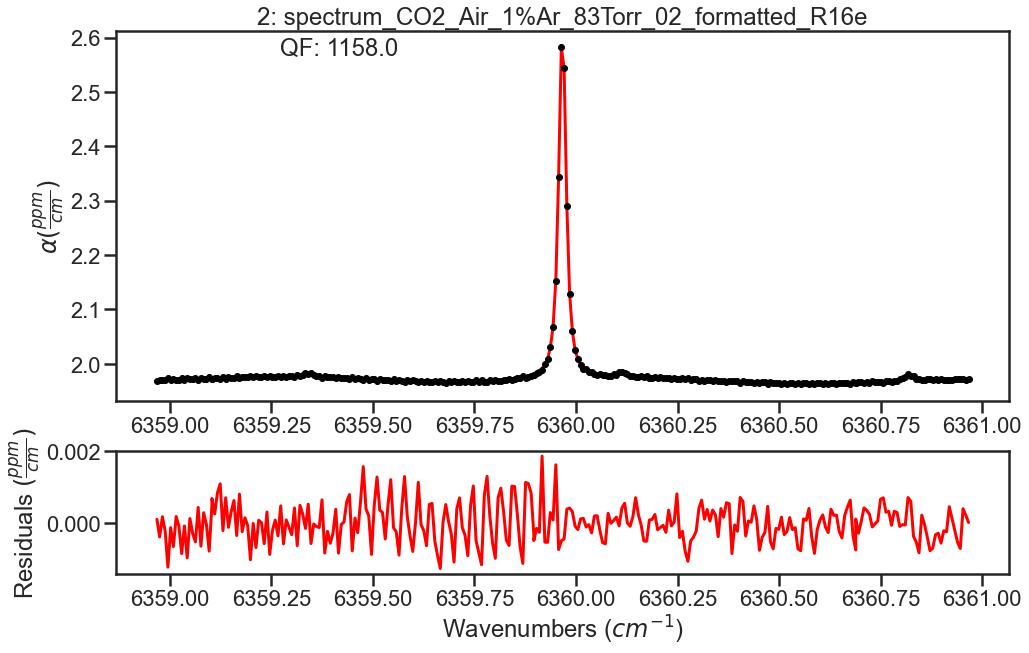

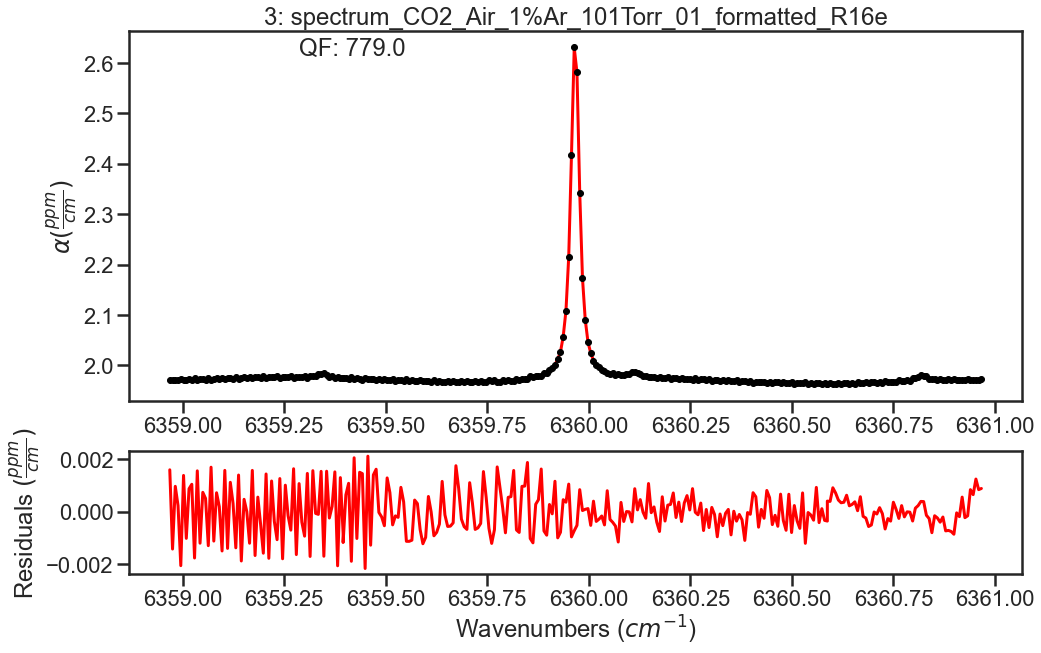

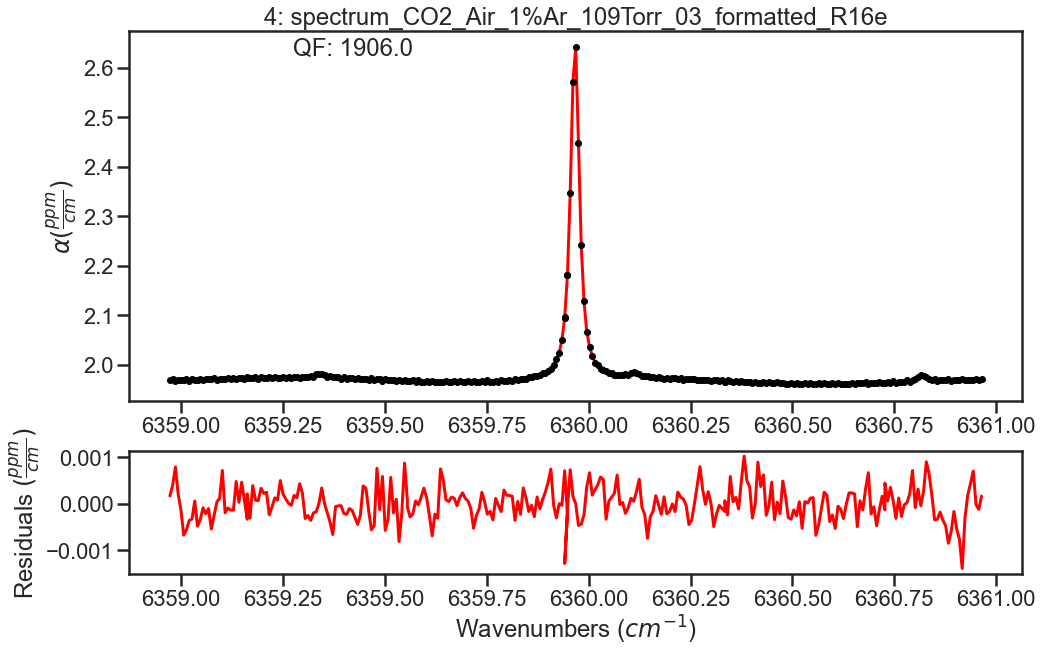

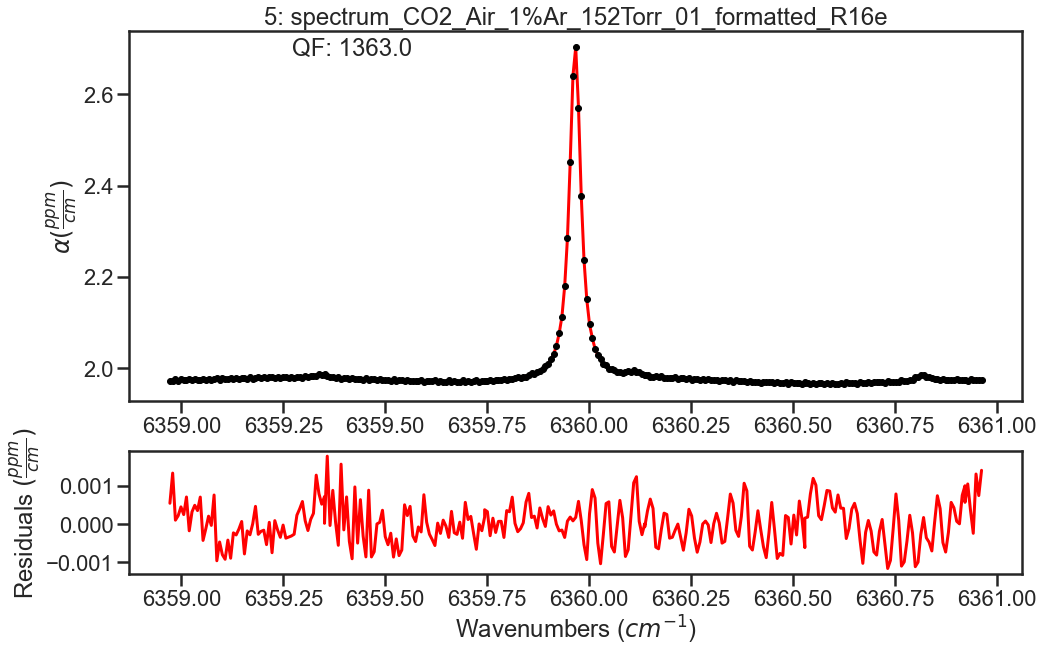

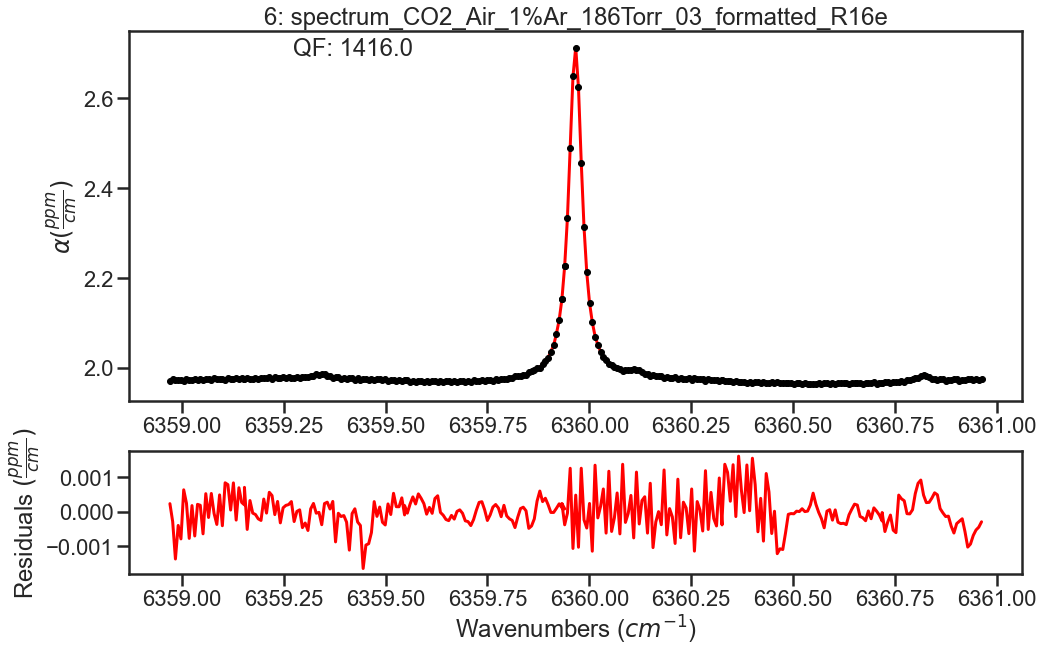

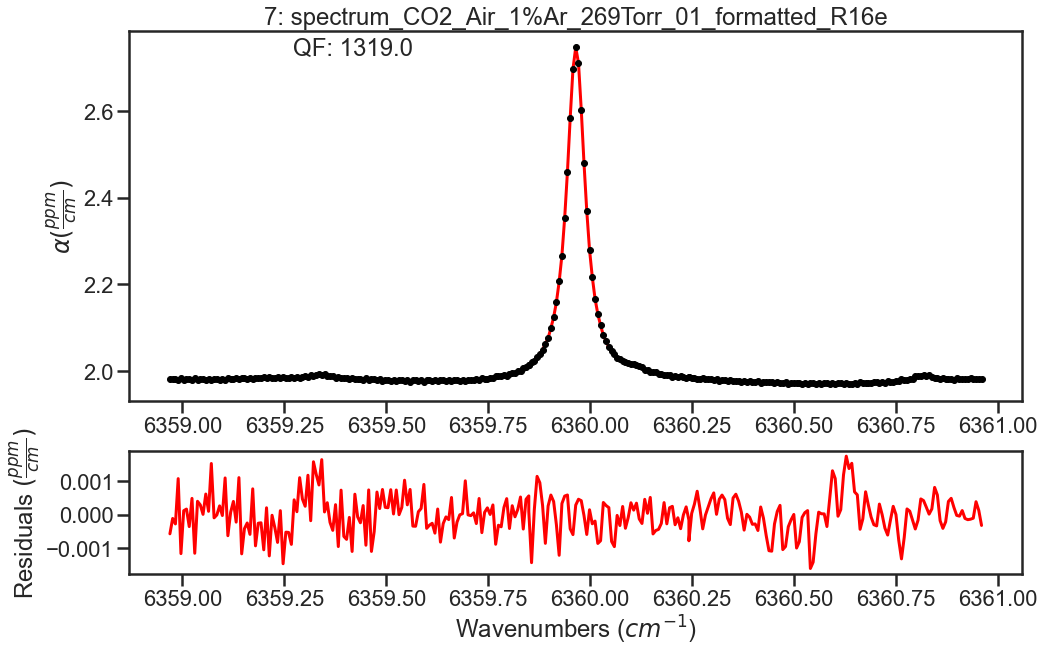

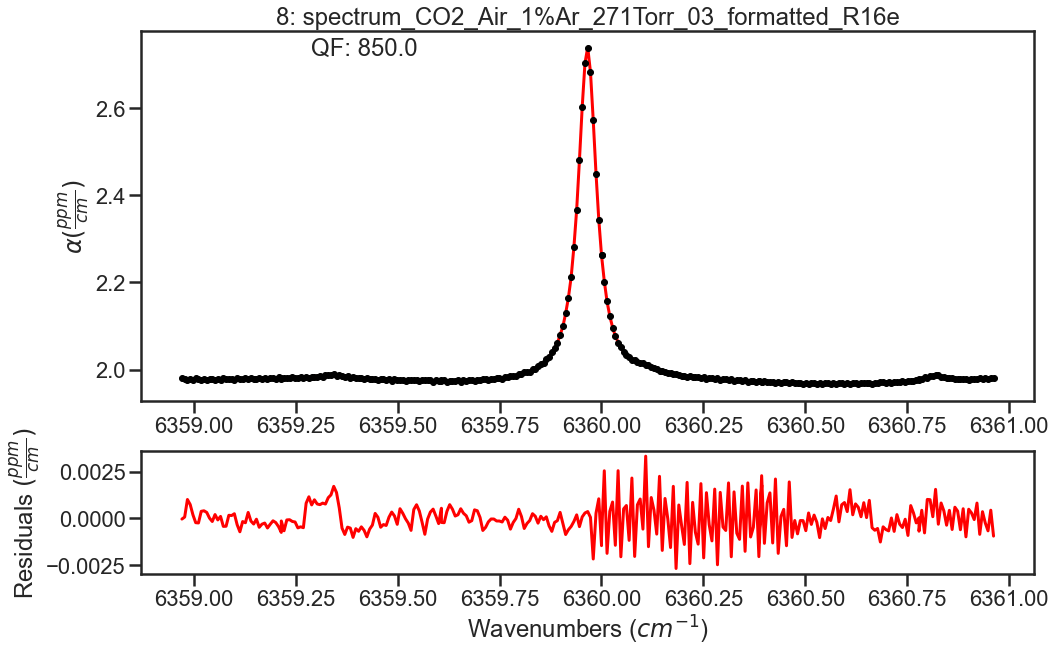

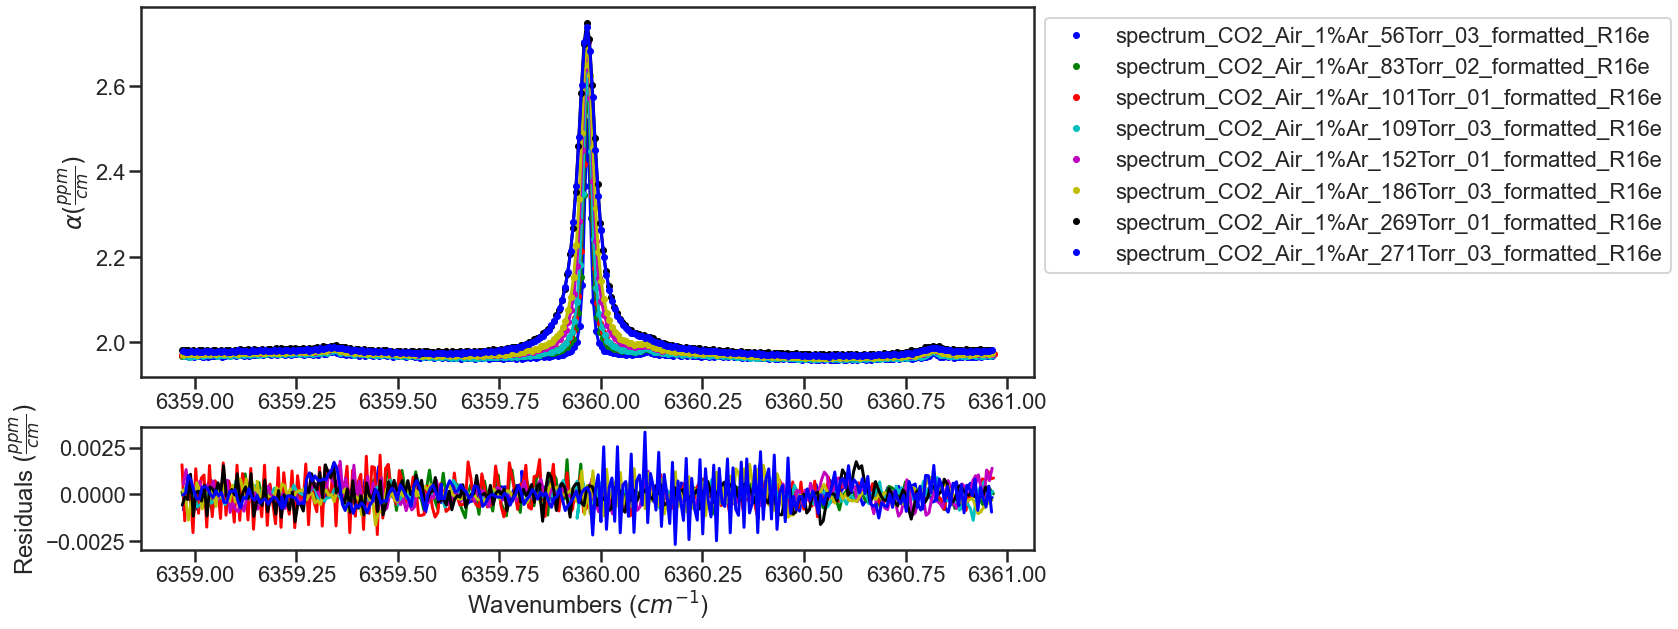

Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_1_0           0.07375     -inf      inf        0    False     None     None
Pressure_1_1           0.07375     -inf      inf        0    False     None     None
Pressure_1_2           0.07375     -inf      inf        0    False     None     None
Pressure_1_3           0.07375     -inf      inf        0    False     None     None
Pressure_2_0            0.1095     -inf      inf        0    False     None     None
Pressure_2_1            0.1095     -inf      inf        0    False     None     None
Pressure_2_2            0.1095     -inf      inf        0    False     None     None
Pressure_2_3            0.1095     -inf      inf        0    False     None     None
Pressure_3_0            0.1325     -inf      inf        0    False     None     None
Pressure_3_1            0.1325     -inf      inf        0    False     None     None
Pressure_3_2            0.1325     -inf      inf        0    Fa

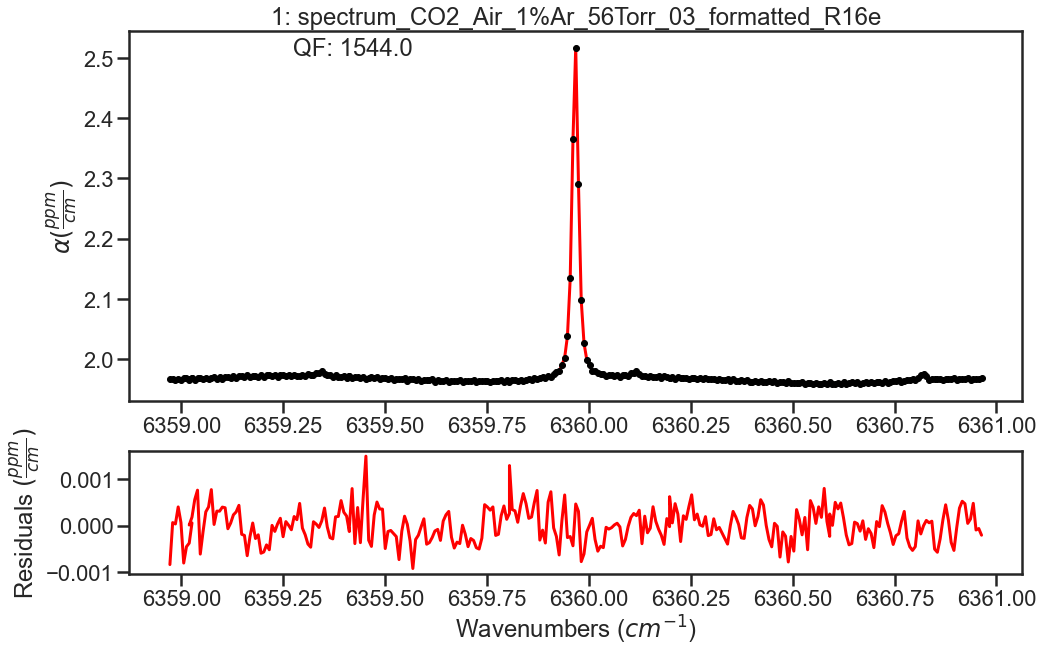

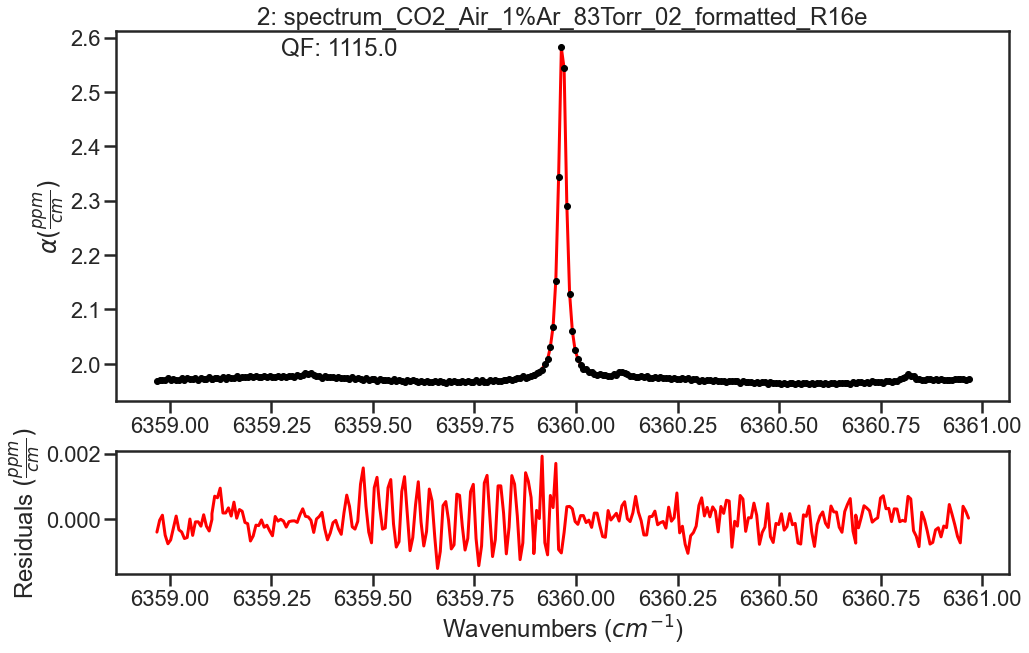

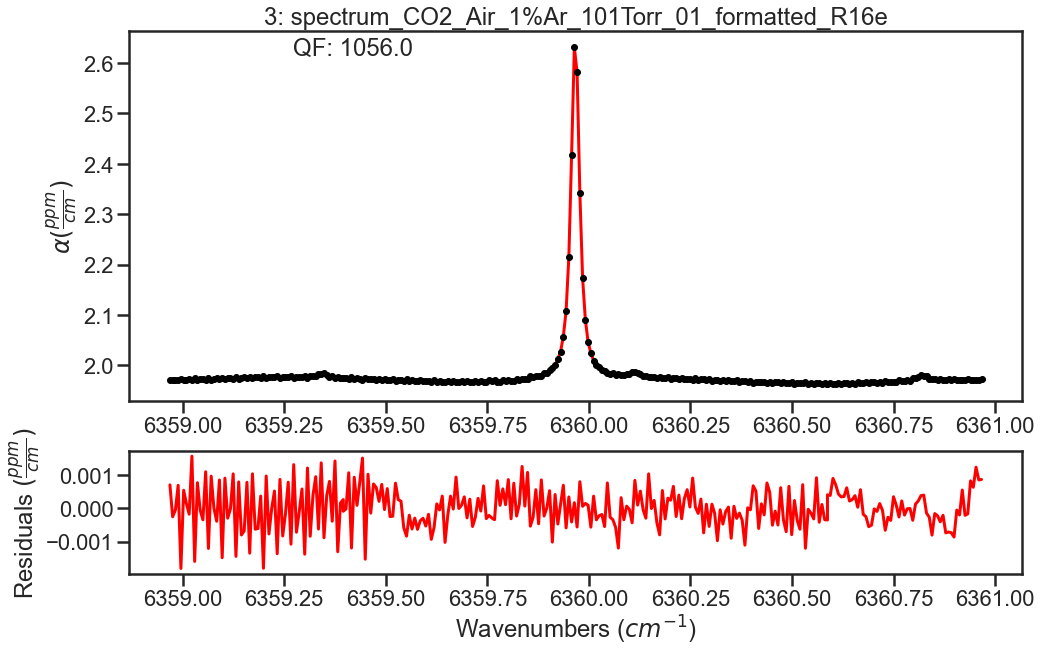

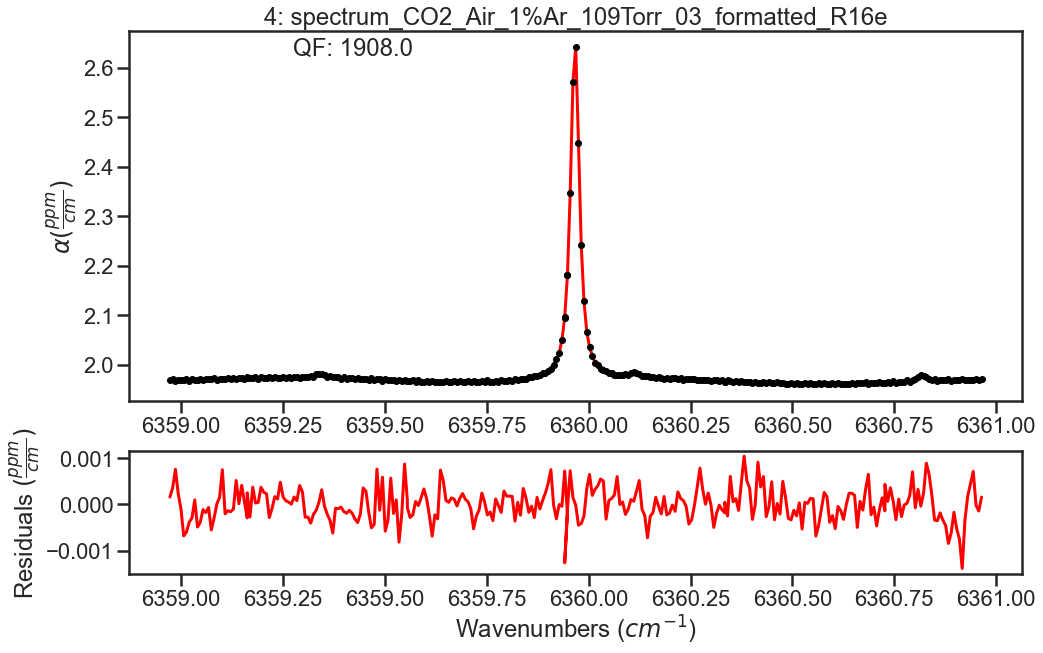

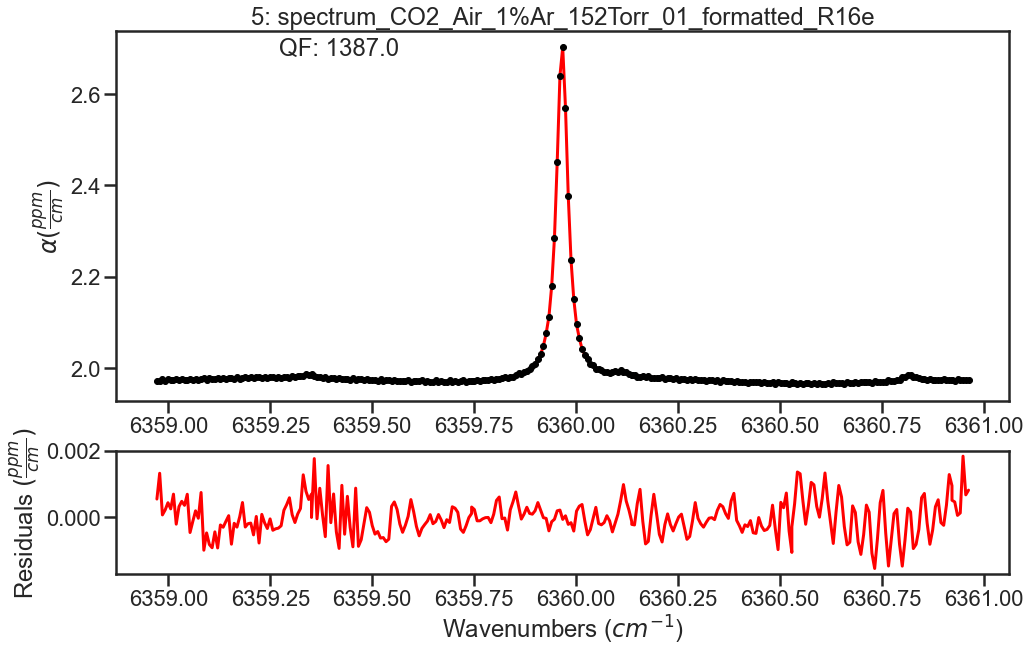

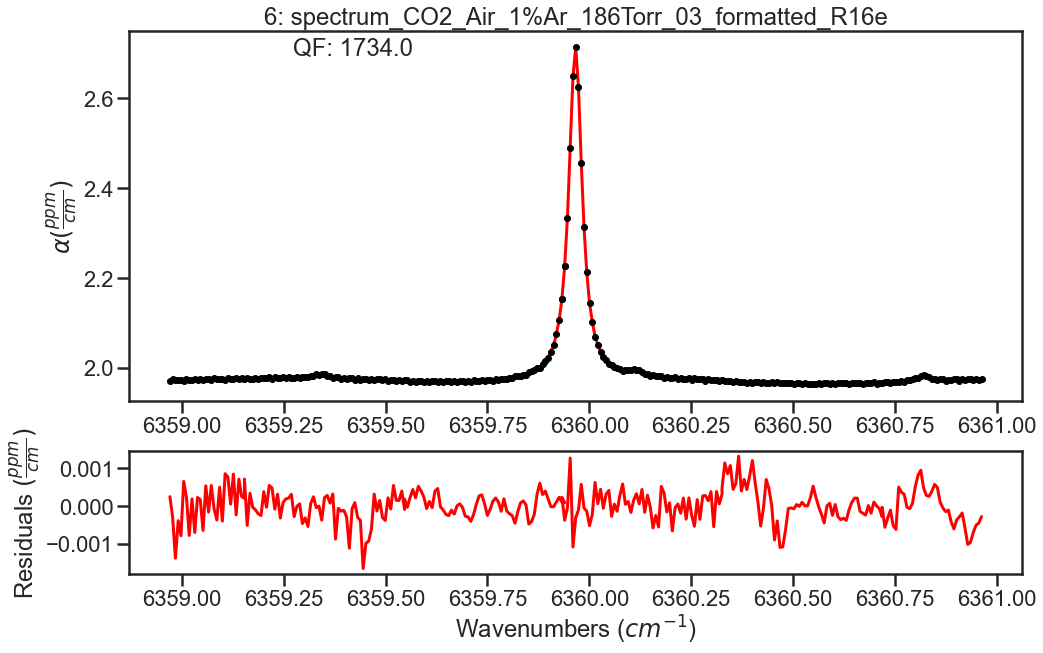

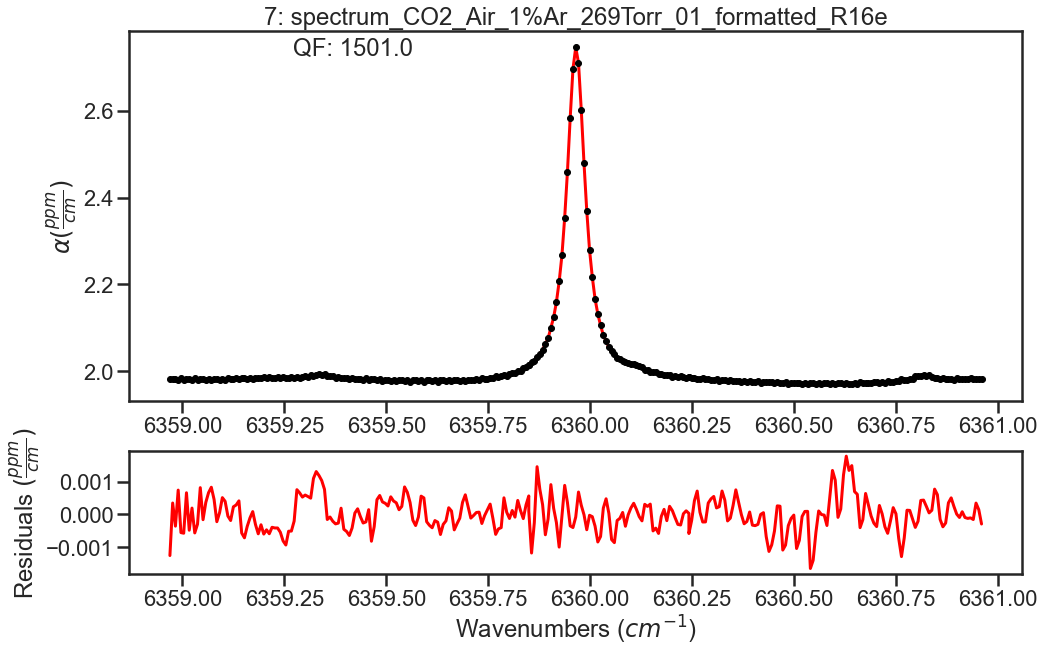

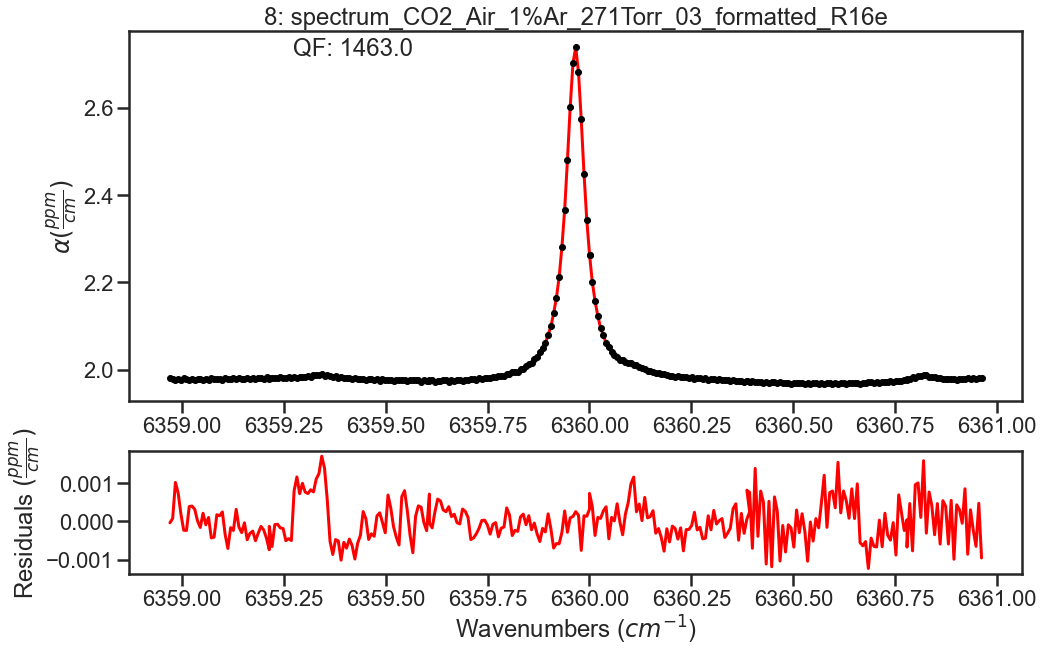

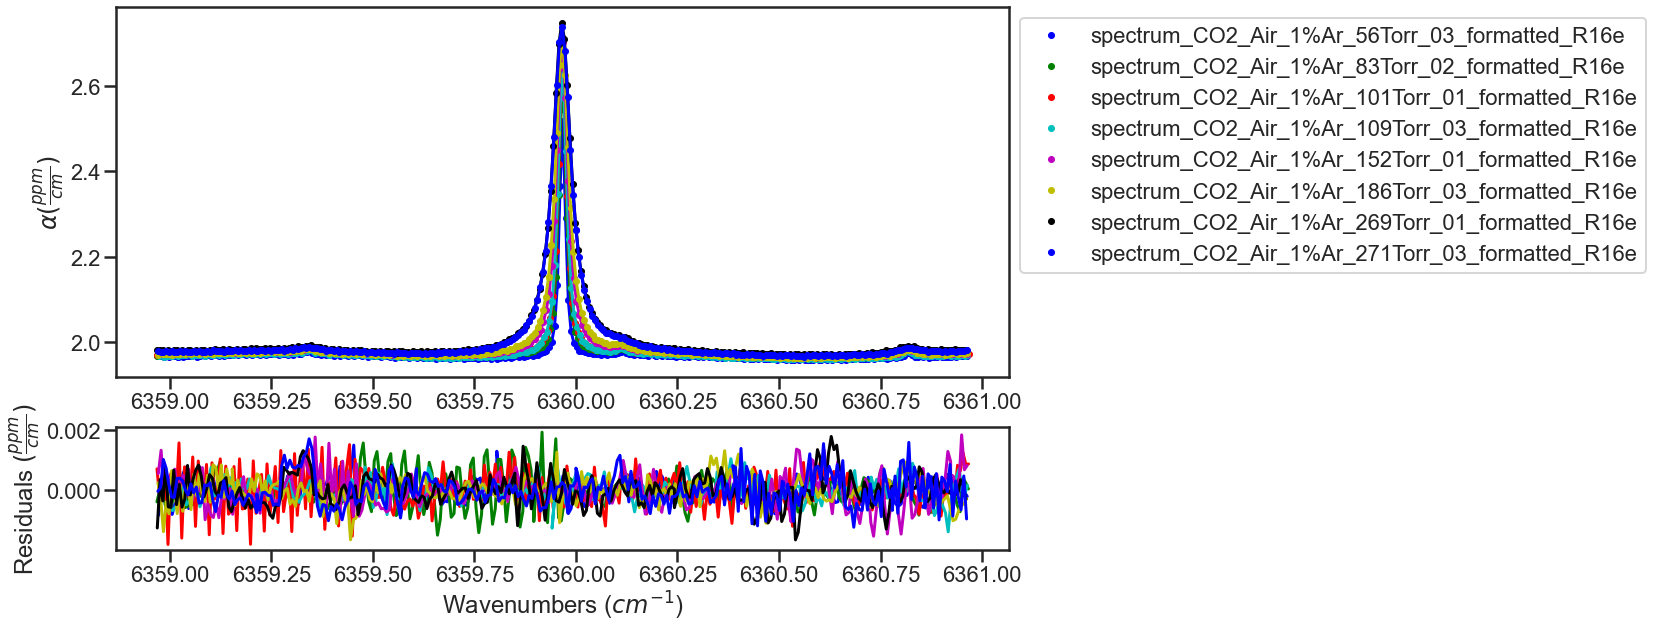

Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_1_0           0.07375     -inf      inf        0    False     None     None
Pressure_1_1           0.07375     -inf      inf        0    False     None     None
Pressure_1_2           0.07375     -inf      inf        0    False     None     None
Pressure_1_3           0.07375     -inf      inf        0    False     None     None
Pressure_2_0            0.1095     -inf      inf        0    False     None     None
Pressure_2_1            0.1095     -inf      inf        0    False     None     None
Pressure_2_2            0.1095     -inf      inf        0    False     None     None
Pressure_2_3            0.1095     -inf      inf        0    False     None     None
Pressure_3_0            0.1325     -inf      inf        0    False     None     None
Pressure_3_1            0.1325     -inf      inf        0    False     None     None
Pressure_3_2            0.1325     -inf      inf        0    Fa

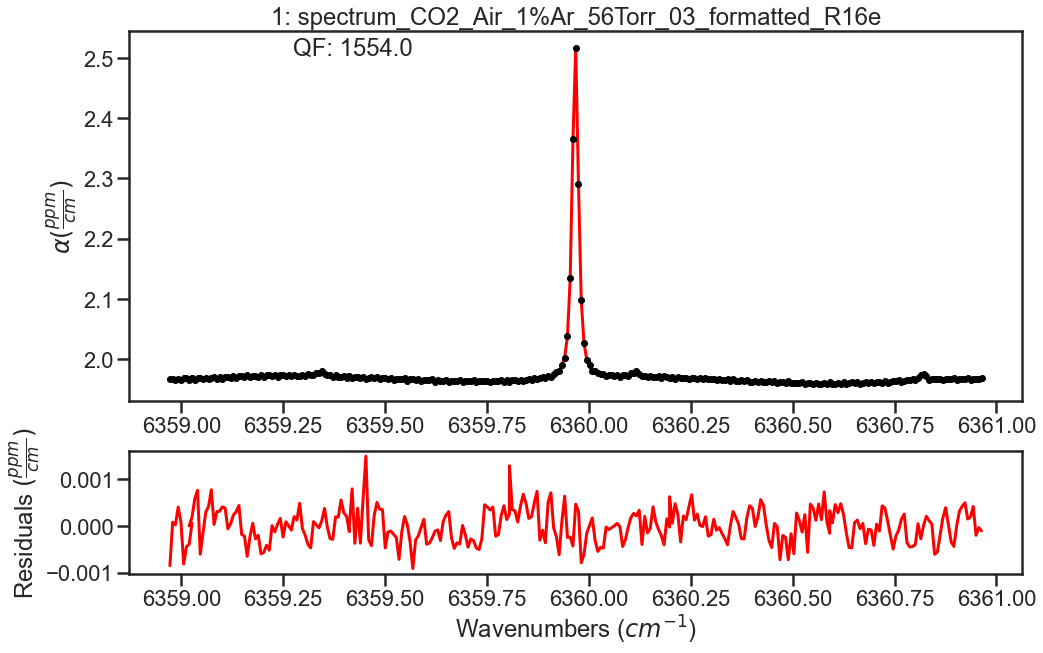

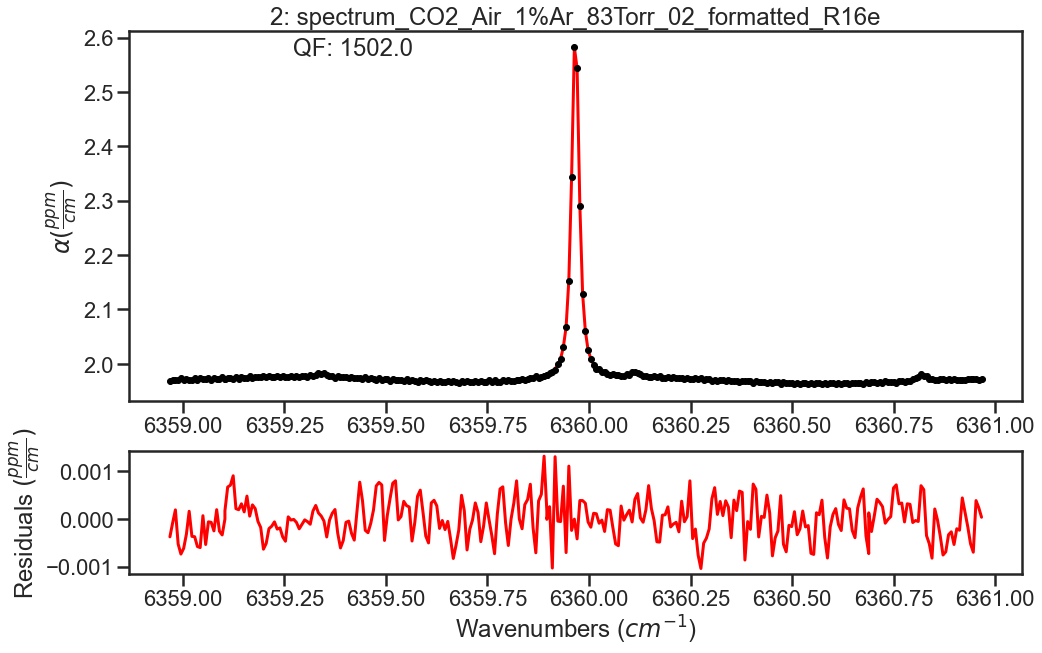

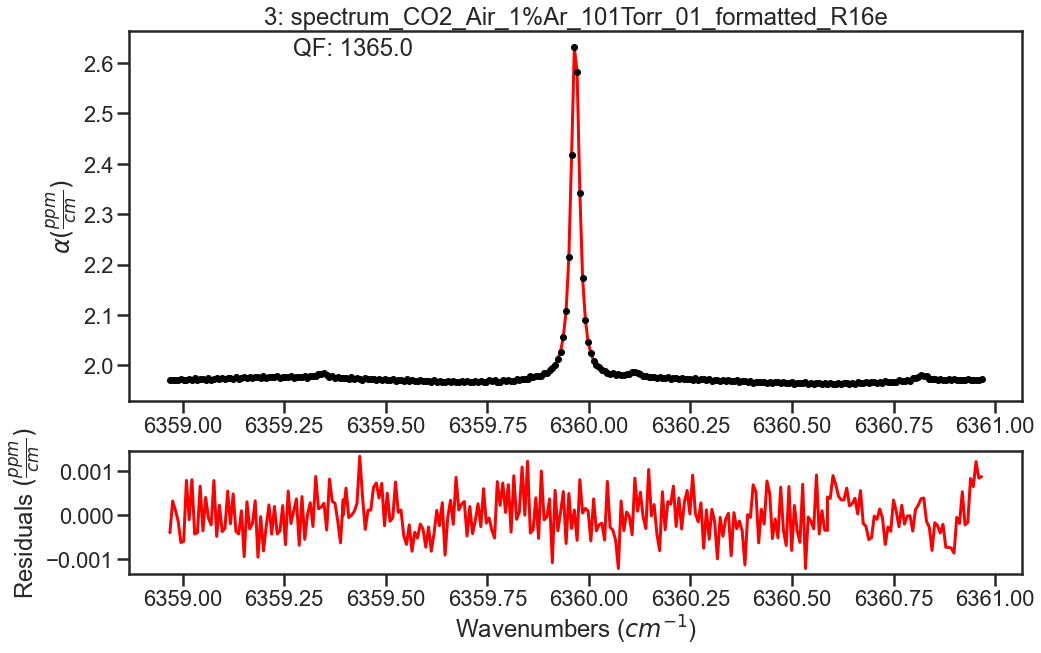

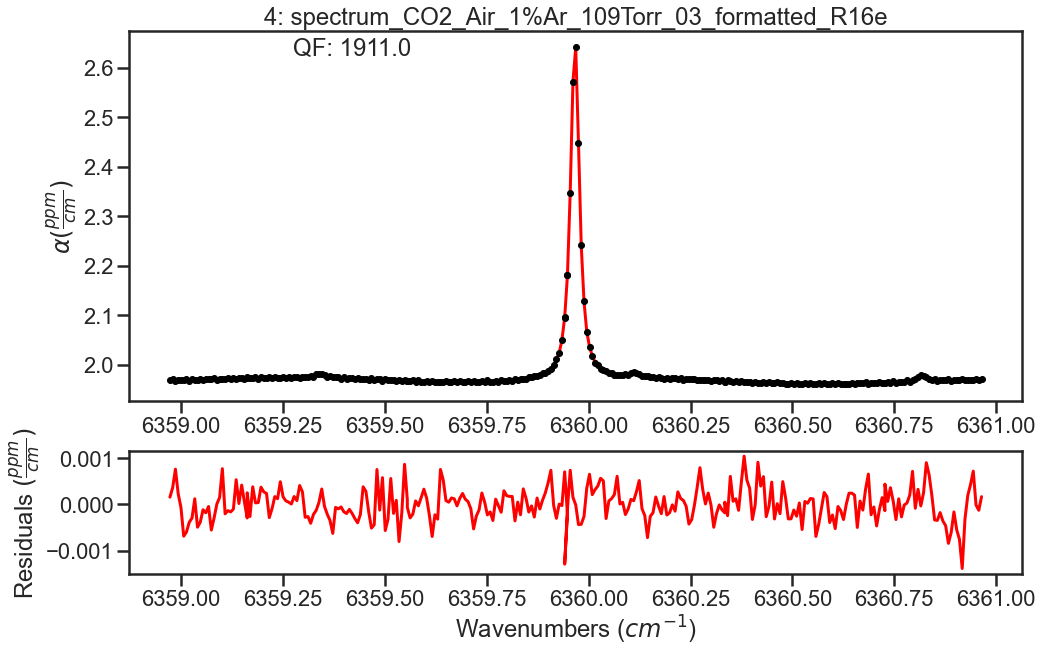

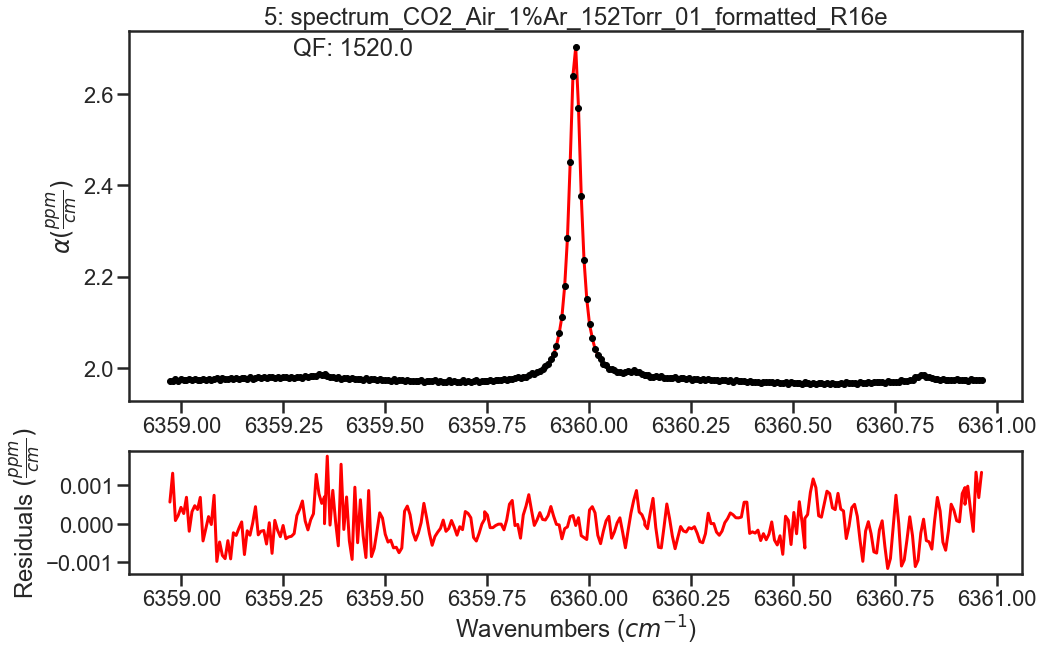

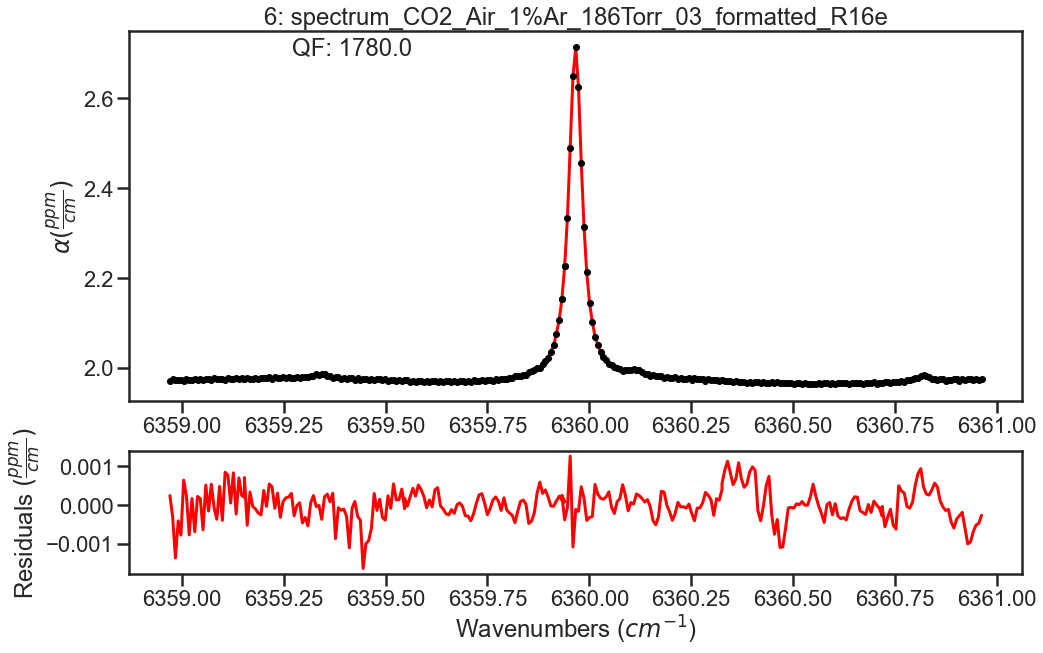

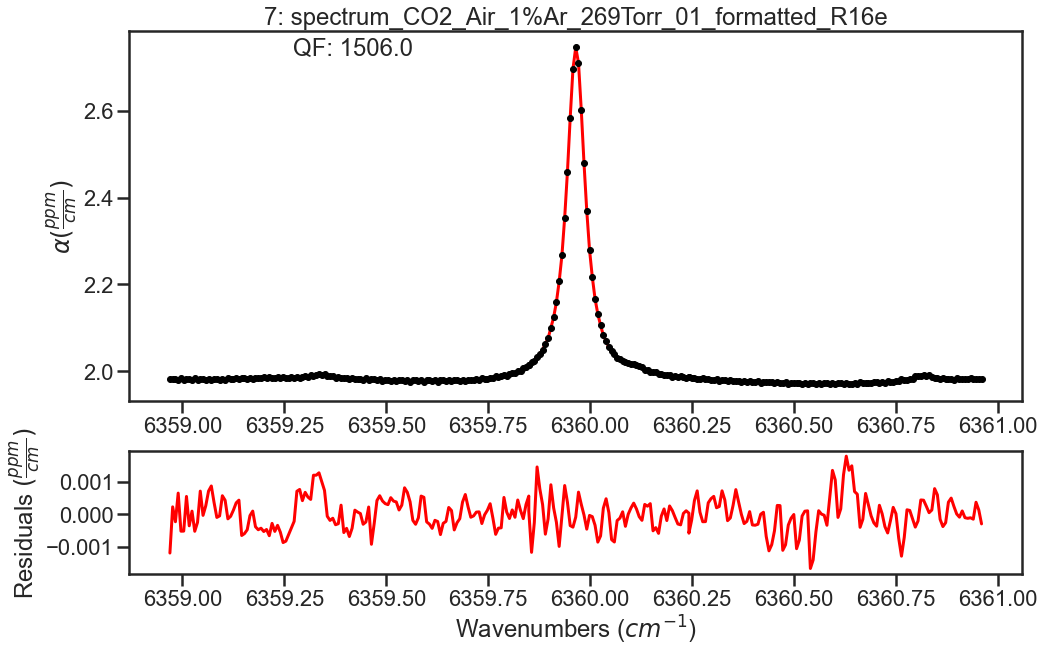

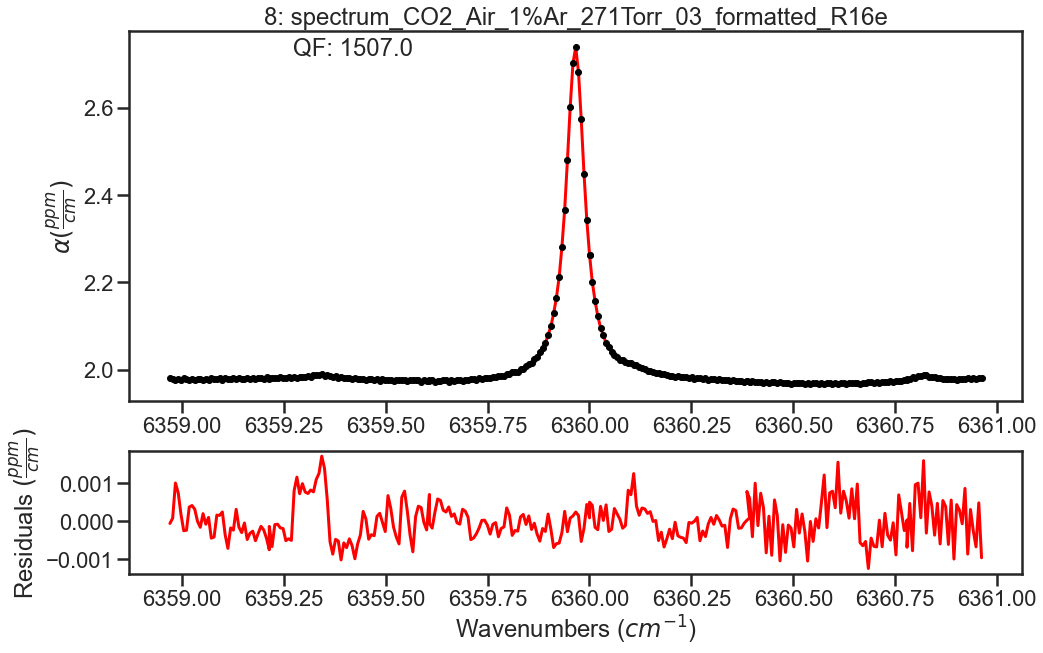

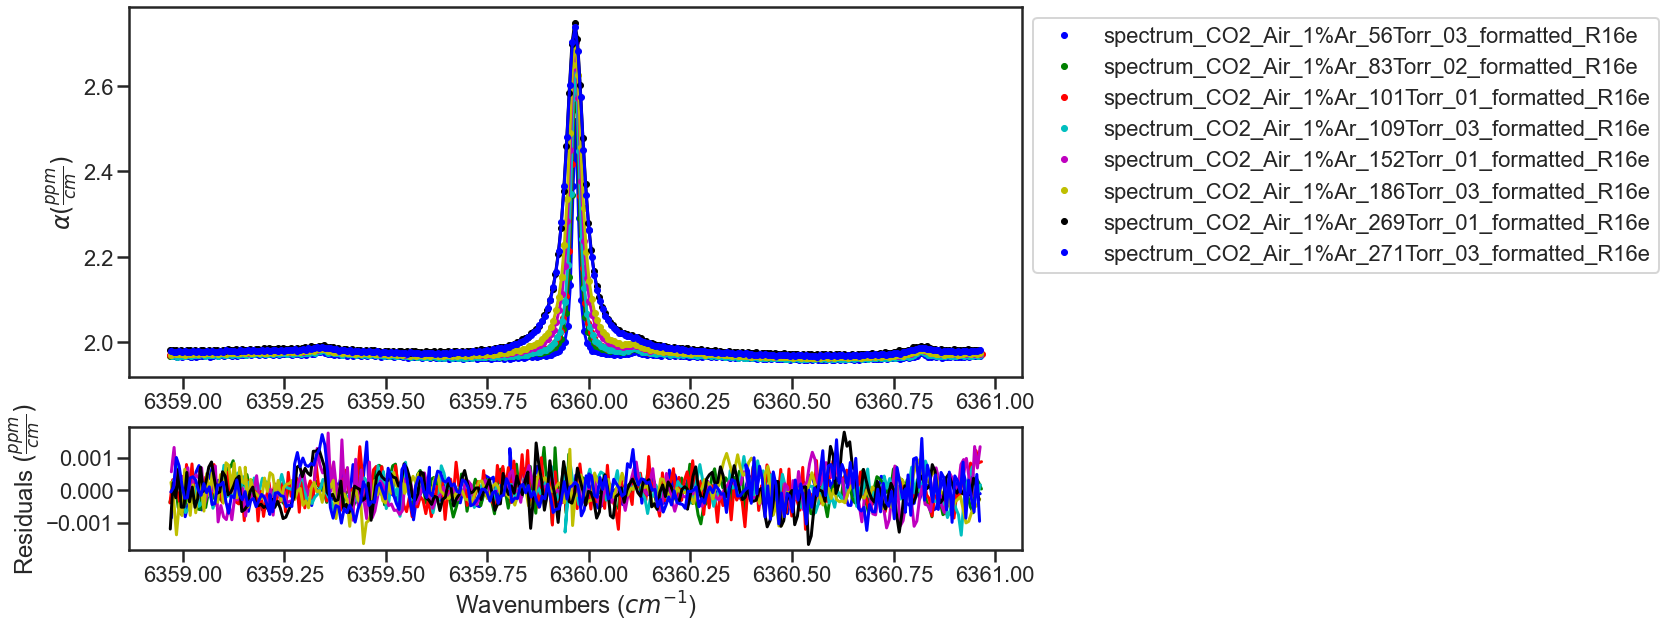

Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_1_0           0.07375     -inf      inf        0    False     None     None
Pressure_1_1           0.07375     -inf      inf        0    False     None     None
Pressure_1_2           0.07375     -inf      inf        0    False     None     None
Pressure_1_3           0.07375     -inf      inf        0    False     None     None
Pressure_2_0            0.1095     -inf      inf        0    False     None     None
Pressure_2_1            0.1095     -inf      inf        0    False     None     None
Pressure_2_2            0.1095     -inf      inf        0    False     None     None
Pressure_2_3            0.1095     -inf      inf        0    False     None     None
Pressure_3_0            0.1325     -inf      inf        0    False     None     None
Pressure_3_1            0.1325     -inf      inf        0    False     None     None
Pressure_3_2            0.1325     -inf      inf        0    Fa

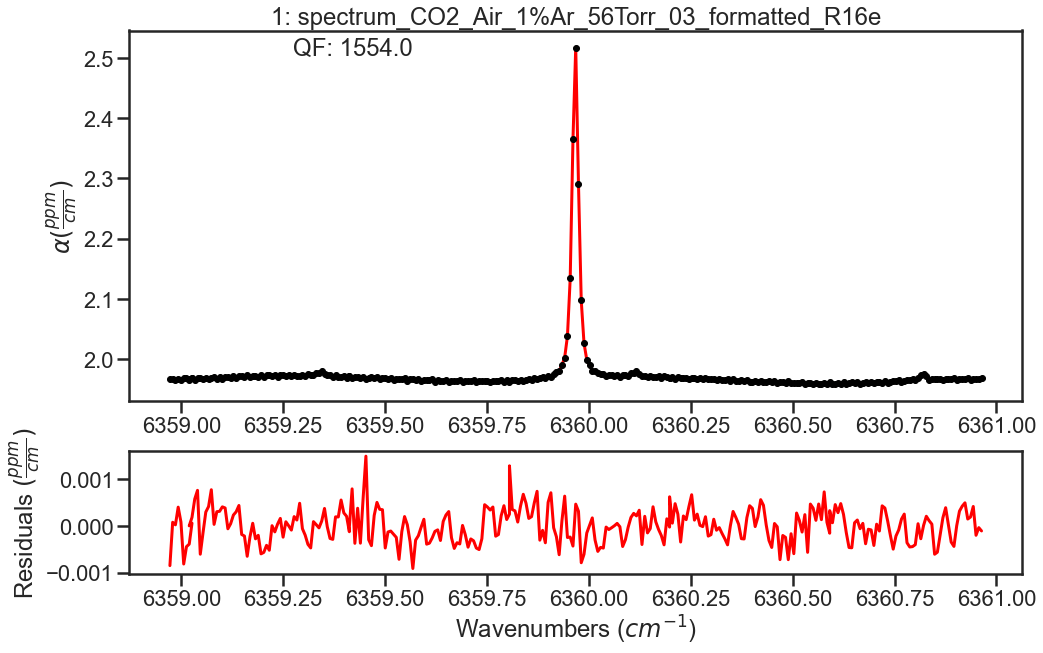

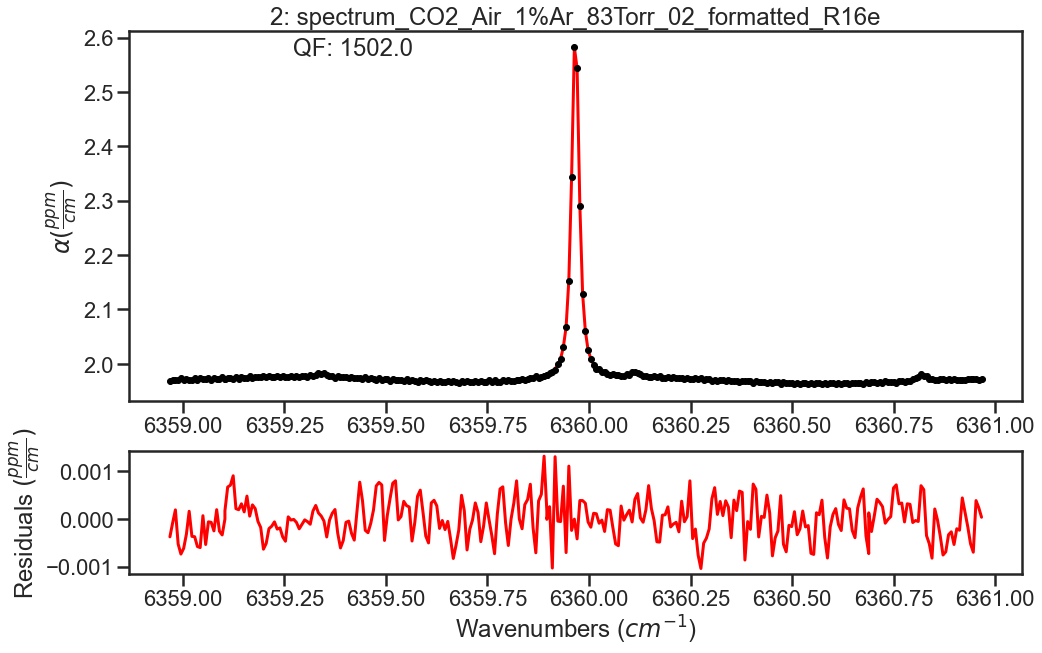

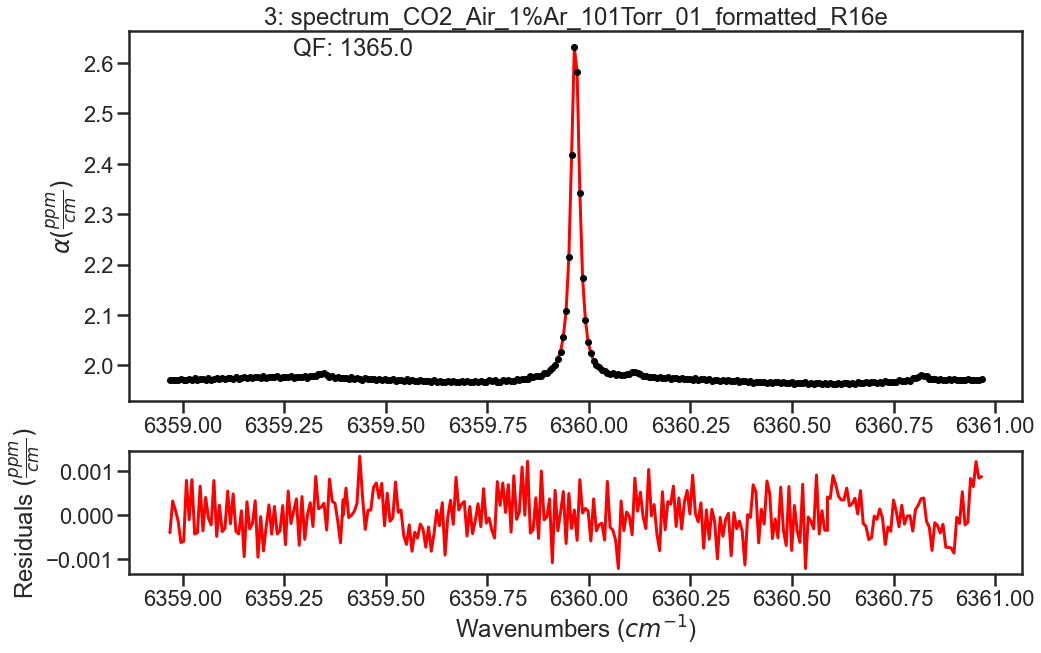

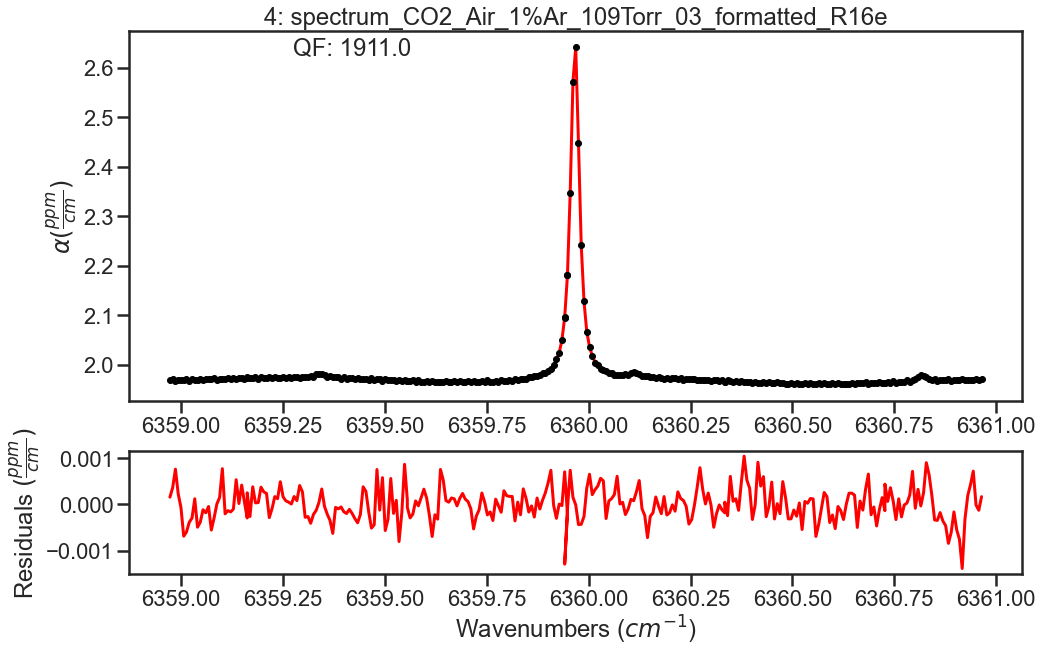

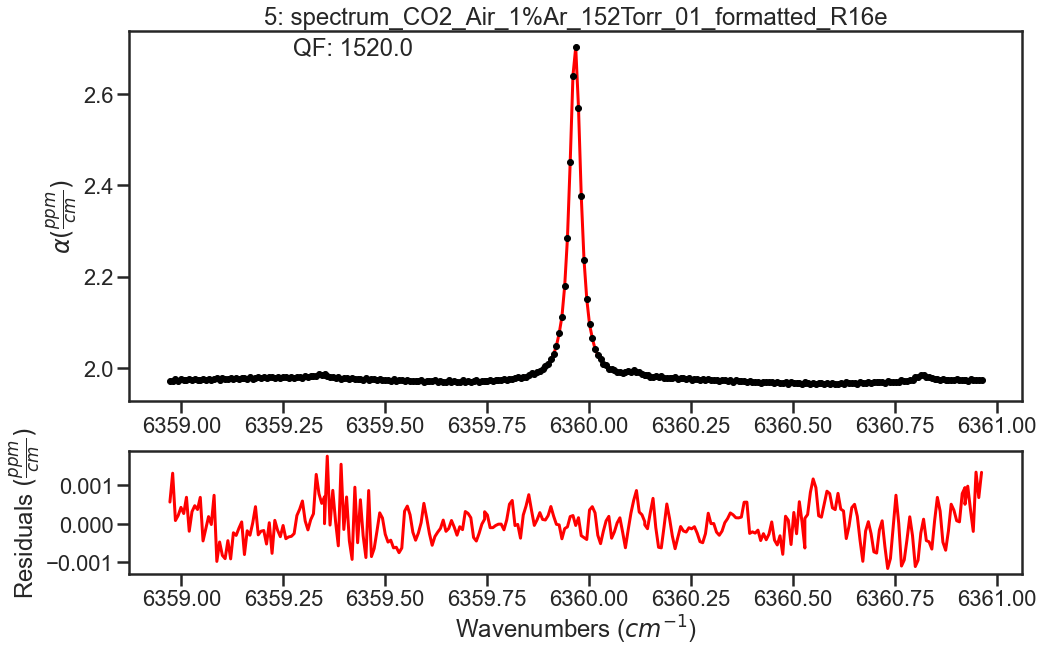

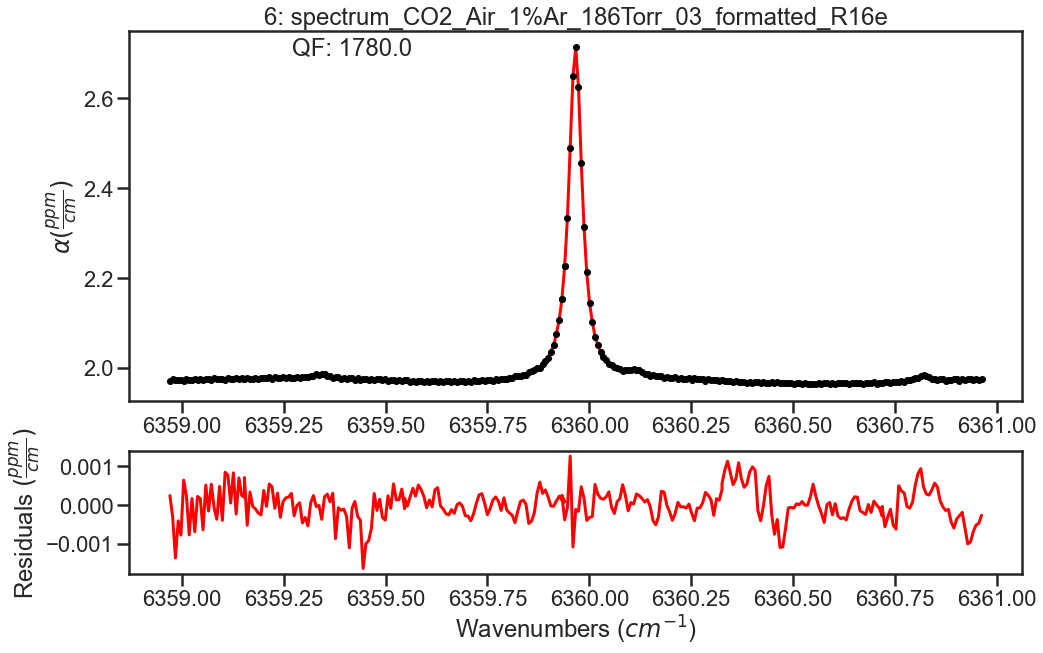

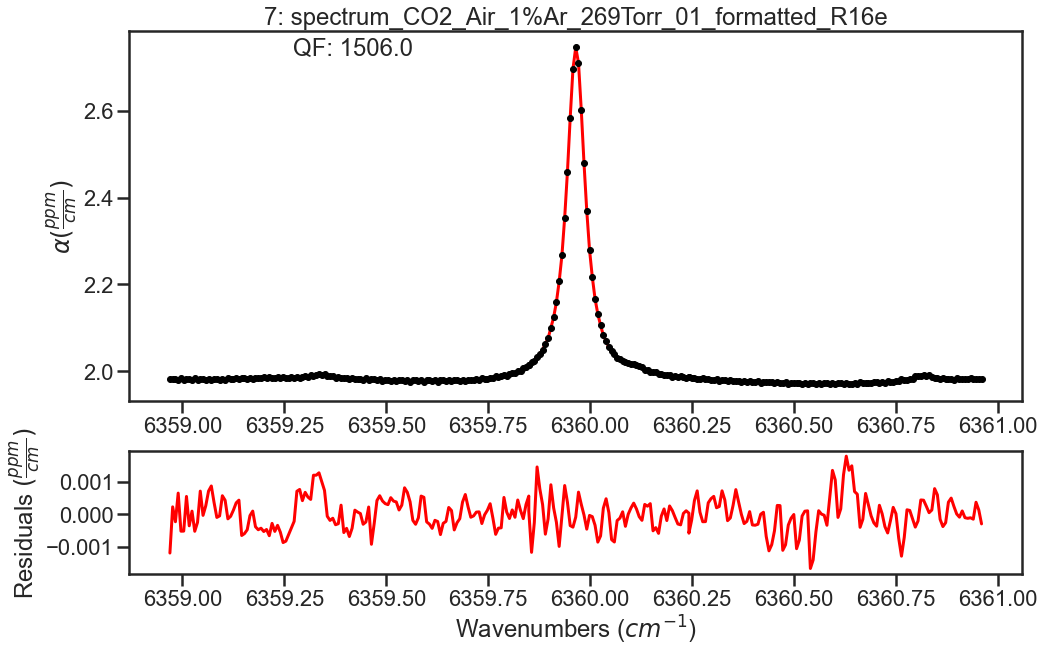

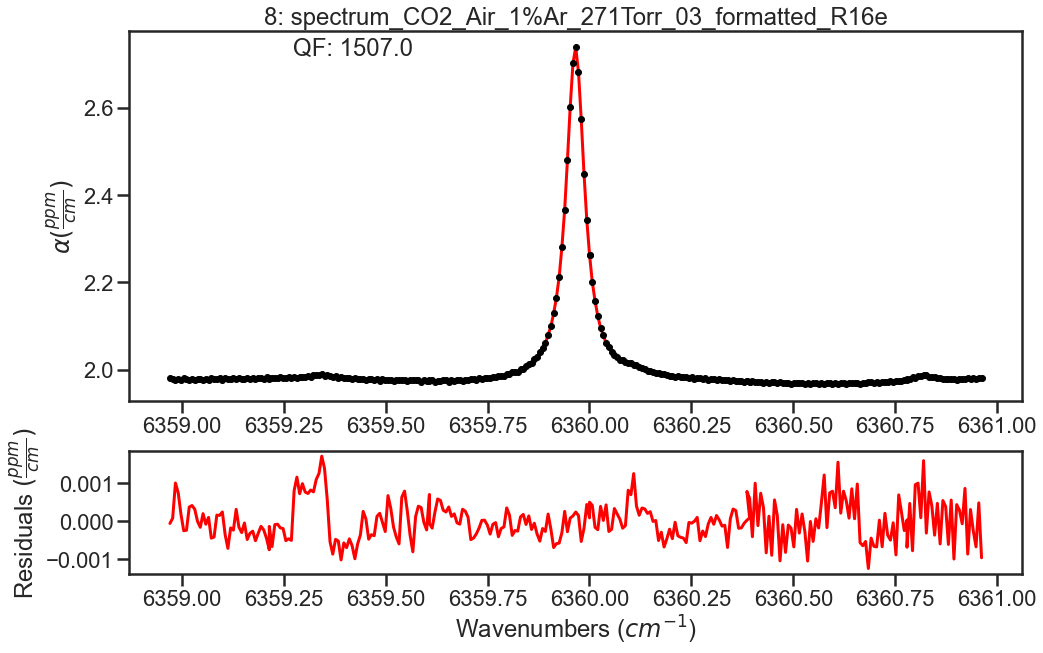

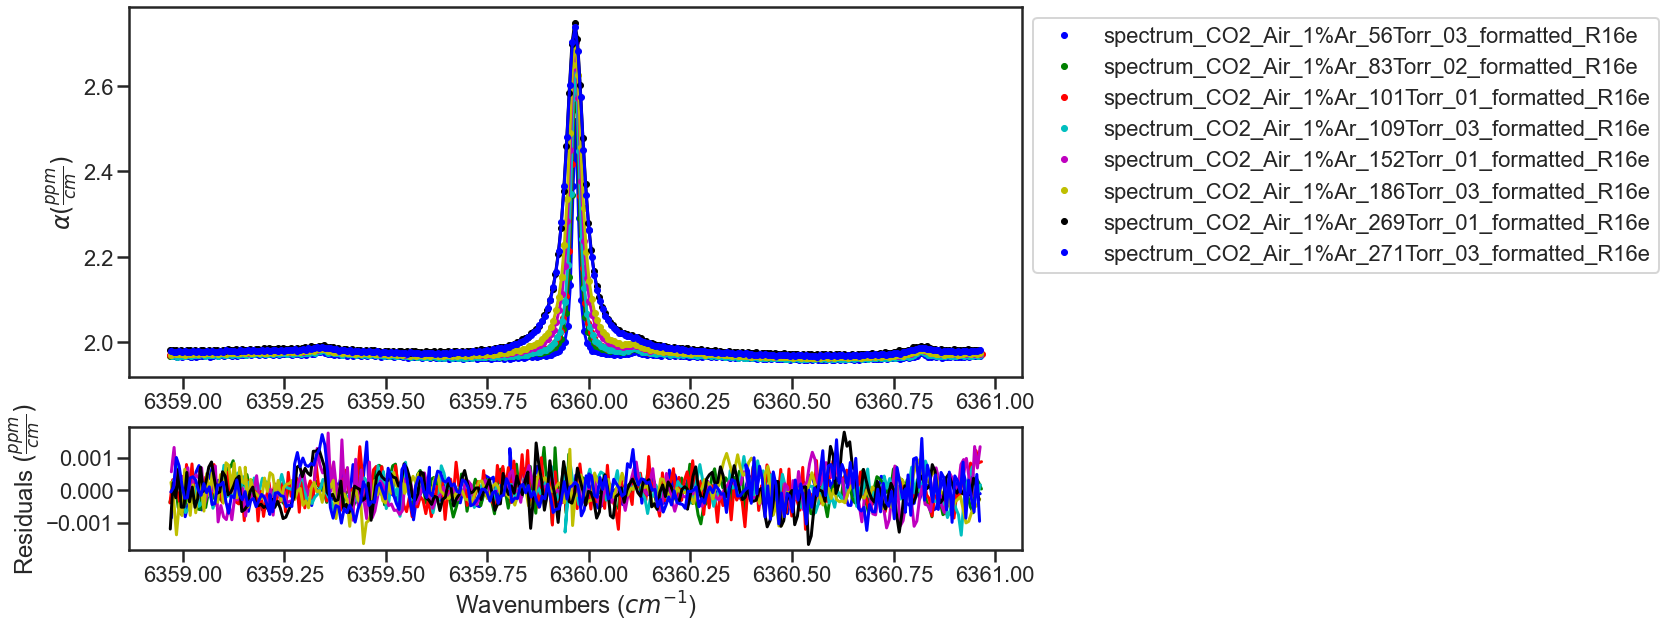

In [4]:

os.chdir(path)   
counter = 0
iterations = 5
while counter < 5:
    fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', minimum_parameter_fit_intensity = Fit_Intensity)
    params = fit_data.generate_params()




    fit_data.constrained_baseline(params, baseline_segment_constrained = True, xshift_segment_constrained = True, molefraction_segment_constrained = True,
                                        etalon_amp_segment_constrained = False, etalon_period_segment_constrained = True, etalon_phase_segment_constrained = False, 
                                        pressure_segment_constrained = True, temperature_segment_constrained = True)


    minimum_segment_spec_1 = spec_1.segments.min()


    for param in params:

        if 'etalon_1_period_' in param:
            if param != 'etalon_1_period_1_' + str(int(minimum_segment_spec_1)):
                params[param].set(expr='etalon_1_period_1_' + str(int(minimum_segment_spec_1)))
        if 'etalon_1_phase_' in param:
            start_ =  (param.find('_', 9))
            end_ =  (param.find('_', param.find('_', 9) + 1))
            spectrum_number = str(param[start_ + 1:end_])

            if param != 'etalon_1_phase_'+spectrum_number + '_' + str(int(minimum_segment_spec_1)):
                params[param].set(expr= 'etalon_1_phase_'+spectrum_number + '_' + str(int(minimum_segment_spec_1)))



        if 'etalon_2_period_' in param:
            if param != 'etalon_2_period_1_' + str(int(minimum_segment_spec_1)):
                params[param].set(expr='etalon_2_period_1_' + str(int(minimum_segment_spec_1)))

        if 'etalon_3_period_' in param:
            if param != 'etalon_3_period_1_' + str(int(minimum_segment_spec_1)):
                params[param].set(expr='etalon_3_period_1_' + str(int(minimum_segment_spec_1)))













    result = fit_data.fit_data(params, wing_cutoff = 25)
    print (result.params.pretty_print())

    fit_data.residual_analysis(result, indv_resid_plot=True)
    fit_data.update_params(result)
    SPECTRA.generate_summary_file(save_file = True)

    SPECTRA.plot_model_residuals()
    counter+=1
    


